# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

C:\Users\samar\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


## 1.1 Reading Data

In [2]:
#project_data = pd.read_csv('train_data.csv')
project_data = pd.read_csv('D:\\Studies\\Hadoop\\Python\\AppliedAICourse\\Notes\\17_Asg__REAL_PROBLEM_PREDICT_RATING_AMAZON\\ASSIGNMENT-2 Apply t-SNE\\Assignments_DonorsChoose\\train_data.csv')

#resource_data = pd.read_csv('resources.csv')
resource_data = pd.read_csv('D:\\Studies\\Hadoop\\Python\\AppliedAICourse\\Notes\\17_Asg__REAL_PROBLEM_PREDICT_RATING_AMAZON\\ASSIGNMENT-2 Apply t-SNE\\Assignments_DonorsChoose\\resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
project_data.head(3)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   
2       21895  p182444  3465aaf82da834c0582ebd0ef8040ca0            Ms.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   
2           AZ        2016-08-31 12:03:56             Grades 6-8   

          project_subject_categories     project_subject_subcategories  \
0                Literacy & Language                     ESL, Literacy   
1  History & Civics, Health & Sports  Civics & Government, Team Sports   
2                    Health & Sports    Health & Wellness, Team Sports   

                                       project_title  \
0   Educational Support for English Learners at Home   
1              Wanted: Projector for Hungry Learners   
2  Soccer Equipment for AWESOME Middle School Stu...   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   
2  \r\n\"True champions aren't always the ones th...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   
2  The students on the campus come to school know...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   
2             NaN  My students need shine guards, athletic socks,...   

   teacher_number_of_previously_posted_projects  project_is_approved  
0                                             0                    0  
1                                             7                    1  
2                                             1                    0

In [5]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]


#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])

# parameter of drop in python | https://www.ritchieng.com/pandas-inplace-parameter/
# parameter of drop in python axis | https://stackoverflow.com/questions/22149584/what-does-axis-in-pandas-mean
#
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)


# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]


project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
55660        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
76127       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

      school_state                Date project_grade_category  \
55660           CA 2016-04-27 00:27:36          Grades PreK-2   
76127           UT 2016-04-27 00:31:25             Grades 3-5   

      project_subject_categories            project_subject_subcategories  \
55660             Math & Science  Applied Sciences, Health & Life Science   
76127              Special Needs                            Special Needs   

                                      project_title  \
55660  Engineering STEAM into the Primary Classroom   
76127                       Sensory Tools for Focus   

                                         project_essay_1  \
55660  I have been fortunate enough to use the Fairy ...   
76127  Imagine being 8-9 years old. You're in your th...   

                                         project_essay_2  \
55660  My students come from a variety of backgrounds...   
76127  Most of my students have autism, anxiety, anot...   

                                         project_essay_3  \
55660  Each month I try to do several science or STEM...   
76127  It is tough to do more than one thing at a tim...   

                                         project_essay_4  \
55660  It is challenging to develop high quality scie...   
76127  When my students are able to calm themselves d...   

                                project_resource_summary  \
55660  My students need STEM kits to learn critical s...   
76127  My students need Boogie Boards for quiet senso...   

       teacher_number_of_previously_posted_projects  project_is_approved  
55660                                            53                    1  
76127                                             4                    1

In [6]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

## 1.2 preprocessing of `project_subject_categories`

In [7]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


In [8]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
55660        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
76127       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

      school_state                Date project_grade_category  \
55660           CA 2016-04-27 00:27:36          Grades PreK-2   
76127           UT 2016-04-27 00:31:25             Grades 3-5   

                 project_subject_subcategories  \
55660  Applied Sciences, Health & Life Science   
76127                            Special Needs   

                                      project_title  \
55660  Engineering STEAM into the Primary Classroom   
76127                       Sensory Tools for Focus   

                                         project_essay_1  \
55660  I have been fortunate enough to use the Fairy ...   
76127  Imagine being 8-9 years old. You're in your th...   

                                         project_essay_2  \
55660  My students come from a variety of backgrounds...   
76127  Most of my students have autism, anxiety, anot...   

                                         project_essay_3  \
55660  Each month I try to do several science or STEM...   
76127  It is tough to do more than one thing at a tim...   

                                         project_essay_4  \
55660  It is challenging to develop high quality scie...   
76127  When my students are able to calm themselves d...   

                                project_resource_summary  \
55660  My students need STEM kits to learn critical s...   
76127  My students need Boogie Boards for quiet senso...   

       teacher_number_of_previously_posted_projects  project_is_approved  \
55660                                            53                    1   
76127                                             4                    1   

      clean_categories  
55660     Math_Science  
76127     SpecialNeeds

## 1.3 preprocessing of `project_subject_subcategories`

In [9]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

In [10]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
55660        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
76127       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

      school_state                Date project_grade_category  \
55660           CA 2016-04-27 00:27:36          Grades PreK-2   
76127           UT 2016-04-27 00:31:25             Grades 3-5   

                                      project_title  \
55660  Engineering STEAM into the Primary Classroom   
76127                       Sensory Tools for Focus   

                                         project_essay_1  \
55660  I have been fortunate enough to use the Fairy ...   
76127  Imagine being 8-9 years old. You're in your th...   

                                         project_essay_2  \
55660  My students come from a variety of backgrounds...   
76127  Most of my students have autism, anxiety, anot...   

                                         project_essay_3  \
55660  Each month I try to do several science or STEM...   
76127  It is tough to do more than one thing at a tim...   

                                         project_essay_4  \
55660  It is challenging to develop high quality scie...   
76127  When my students are able to calm themselves d...   

                                project_resource_summary  \
55660  My students need STEM kits to learn critical s...   
76127  My students need Boogie Boards for quiet senso...   

       teacher_number_of_previously_posted_projects  project_is_approved  \
55660                                            53                    1   
76127                                             4                    1   

      clean_categories                 clean_subcategories  
55660     Math_Science  AppliedSciences Health_LifeScience  
76127     SpecialNeeds                        SpecialNeeds

## 1.3 Text preprocessing

In [11]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [12]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
55660        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
76127       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

      school_state                Date project_grade_category  \
55660           CA 2016-04-27 00:27:36          Grades PreK-2   
76127           UT 2016-04-27 00:31:25             Grades 3-5   

                                      project_title  \
55660  Engineering STEAM into the Primary Classroom   
76127                       Sensory Tools for Focus   

                                         project_essay_1  \
55660  I have been fortunate enough to use the Fairy ...   
76127  Imagine being 8-9 years old. You're in your th...   

                                         project_essay_2  \
55660  My students come from a variety of backgrounds...   
76127  Most of my students have autism, anxiety, anot...   

                                         project_essay_3  \
55660  Each month I try to do several science or STEM...   
76127  It is tough to do more than one thing at a tim...   

                                         project_essay_4  \
55660  It is challenging to develop high quality scie...   
76127  When my students are able to calm themselves d...   

                                project_resource_summary  \
55660  My students need STEM kits to learn critical s...   
76127  My students need Boogie Boards for quiet senso...   

       teacher_number_of_previously_posted_projects  project_is_approved  \
55660                                            53                    1   
76127                                             4                    1   

      clean_categories                 clean_subcategories  \
55660     Math_Science  AppliedSciences Health_LifeScience   
76127     SpecialNeeds                        SpecialNeeds   

                                                   essay  
55660  I have been fortunate enough to use the Fairy ...  
76127  Imagine being 8-9 years old. You're in your th...

#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [13]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

I have been fortunate enough to use the Fairy Tale STEM kits in my classroom as well as the STEM journals, which my students really enjoyed.  I would love to implement more of the Lakeshore STEM kits in my classroom for the next school year as they provide excellent and engaging STEM lessons.My students come from a variety of backgrounds, including language and socioeconomic status.  Many of them don't have a lot of experience in science and engineering and these kits give me the materials to provide these exciting opportunities for my students.Each month I try to do several science or STEM/STEAM projects.  I would use the kits and robot to help guide my science instruction in engaging and meaningful ways.  I can adapt the kits to my current language arts pacing guide where we already teach some of the material in the kits like tall tales (Paul Bunyan) or Johnny Appleseed.  The following units will be taught in the next school year where I will implement these kits: magnets, motion, si

In [14]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [15]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

\"A person is a person, no matter how small.\" (Dr.Seuss) I teach the smallest students with the biggest enthusiasm for learning. My students learn in many different ways using all of our senses and multiple intelligences. I use a wide range of techniques to help all my students succeed. \r\nStudents in my class come from a variety of different backgrounds which makes for wonderful sharing of experiences and cultures, including Native Americans.\r\nOur school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom. Kindergarteners in my class love to work with hands-on materials and have many different opportunities to practice a skill before it is mastered. Having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum.Montana is the perfect place to learn about agriculture and nutrition. My students love to role play in our pretend kitchen in the ear

In [16]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

 A person is a person, no matter how small.  (Dr.Seuss) I teach the smallest students with the biggest enthusiasm for learning. My students learn in many different ways using all of our senses and multiple intelligences. I use a wide range of techniques to help all my students succeed.   Students in my class come from a variety of different backgrounds which makes for wonderful sharing of experiences and cultures, including Native Americans.  Our school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom. Kindergarteners in my class love to work with hands-on materials and have many different opportunities to practice a skill before it is mastered. Having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum.Montana is the perfect place to learn about agriculture and nutrition. My students love to role play in our pretend kitchen in the early chi

In [17]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

 A person is a person no matter how small Dr Seuss I teach the smallest students with the biggest enthusiasm for learning My students learn in many different ways using all of our senses and multiple intelligences I use a wide range of techniques to help all my students succeed Students in my class come from a variety of different backgrounds which makes for wonderful sharing of experiences and cultures including Native Americans Our school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom Kindergarteners in my class love to work with hands on materials and have many different opportunities to practice a skill before it is mastered Having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum Montana is the perfect place to learn about agriculture and nutrition My students love to role play in our pretend kitchen in the early childhood classroom

In [18]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [19]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|████████████████████████████████████████████████████████████████████████| 109248/109248 [01:03<00:00, 1718.32it/s]


In [20]:
# after preprocesing
preprocessed_essays[20000]

'person person no matter small dr seuss teach smallest students biggest enthusiasm learning students learn many different ways using senses multiple intelligences use wide range techniques help students succeed students class come variety different backgrounds makes wonderful sharing experiences cultures including native americans school caring community successful learners seen collaborative student project based learning classroom kindergarteners class love work hands materials many different opportunities practice skill mastered social skills work cooperatively friends crucial aspect kindergarten curriculum montana perfect place learn agriculture nutrition students love role play pretend kitchen early childhood classroom several kids ask try cooking real food take idea create common core cooking lessons learn important math writing concepts cooking delicious healthy food snack time students grounded appreciation work went making food knowledge ingredients came well healthy bodies pr

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [21]:
# similarly you can preprocess the titles also

In [22]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
55660        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
76127       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

      school_state                Date project_grade_category  \
55660           CA 2016-04-27 00:27:36          Grades PreK-2   
76127           UT 2016-04-27 00:31:25             Grades 3-5   

                                      project_title  \
55660  Engineering STEAM into the Primary Classroom   
76127                       Sensory Tools for Focus   

                                         project_essay_1  \
55660  I have been fortunate enough to use the Fairy ...   
76127  Imagine being 8-9 years old. You're in your th...   

                                         project_essay_2  \
55660  My students come from a variety of backgrounds...   
76127  Most of my students have autism, anxiety, anot...   

                                         project_essay_3  \
55660  Each month I try to do several science or STEM...   
76127  It is tough to do more than one thing at a tim...   

                                         project_essay_4  \
55660  It is challenging to develop high quality scie...   
76127  When my students are able to calm themselves d...   

                                project_resource_summary  \
55660  My students need STEM kits to learn critical s...   
76127  My students need Boogie Boards for quiet senso...   

       teacher_number_of_previously_posted_projects  project_is_approved  \
55660                                            53                    1   
76127                                             4                    1   

      clean_categories                 clean_subcategories  \
55660     Math_Science  AppliedSciences Health_LifeScience   
76127     SpecialNeeds                        SpecialNeeds   

                                                   essay  
55660  I have been fortunate enough to use the Fairy ...  
76127  Imagine being 8-9 years old. You're in your th...

In [23]:
# printing some random essays.
print(project_data['project_title'].values[0])
print("="*50)
print(project_data['project_title'].values[150])
print("="*50)
print(project_data['project_title'].values[1000])
print("="*50)
print(project_data['project_title'].values[20000])
print("="*50)
print(project_data['project_title'].values[99999])
print("="*50)

Engineering STEAM into the Primary Classroom
Building Blocks for Learning
Empowering Students Through Art:Learning About Then and Now
Health Nutritional Cooking in Kindergarten
Turning to Flexible Seating: One Sixth-Grade Class's Journey to Freedom


In [24]:
sent_title = decontracted(project_data['project_title'].values[20000])
print(sent_title)
print("="*50)

Health Nutritional Cooking in Kindergarten


In [25]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent_title = sent_title.replace('\\r', ' ')
sent_title = sent_title.replace('\\"', ' ')
sent_title = sent_title.replace('\\n', ' ')
print(sent_title)

Health Nutritional Cooking in Kindergarten


In [26]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent_title = re.sub('[^A-Za-z0-9]+', ' ', sent_title)
print(sent_title)

Health Nutritional Cooking in Kindergarten


In [27]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_title = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent_title = decontracted(sentance)
    sent_title = sent_title.replace('\\r', ' ')
    sent_title = sent_title.replace('\\"', ' ')
    sent_title = sent_title.replace('\\n', ' ')
    sent_title = re.sub('[^A-Za-z0-9]+', ' ', sent_title)
    # https://gist.github.com/sebleier/554280
    sent_title = ' '.join(e for e in sent_title.split() if e not in stopwords)
    preprocessed_title.append(sent_title.lower().strip())

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:02<00:00, 41398.72it/s]


In [28]:
# after preprocesing
preprocessed_title[10]

'a flexible classroom flexible minds'

## 1.5 Preparing data for models

In [29]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [30]:
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
# fit_transform(raw_documents[, y])	Learn the vocabulary dictionary and return term-document matrix.
categories_one_hot = vectorizer.fit_transform(project_data['clean_categories'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",categories_one_hot.shape)

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of matrix after one hot encodig  (109248, 9)


In [31]:
# we use count vectorizer to convert the values into one 
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
sub_categories_one_hot = vectorizer.fit_transform(project_data['clean_subcategories'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",sub_categories_one_hot.shape)

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of matrix after one hot encodig  (109248, 30)


In [32]:
# you can do the similar thing with state, teacher_prefix and project_grade_category also

### teacher_prefix : categorical data (one hot encoding)

In [33]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter_teacher_prefix = Counter()
for word in project_data['teacher_prefix'].values:
# https://stackoverflow.com/questions/52736900/how-to-solve-the-attribute-error-float-object-has-no-attribute-split-in-pyth    
    my_counter_teacher_prefix.update(str(word).split())
    
print(my_counter_teacher_prefix)

Counter({'Mrs.': 57269, 'Ms.': 38955, 'Mr.': 10648, 'Teacher': 2360, 'Dr.': 13, 'nan': 3})


In [34]:
tea_pfx_dict = dict(my_counter_teacher_prefix)
sorted_tea_pfx_dict = dict(sorted(tea_pfx_dict.items(), key=lambda kv: kv[1]))

print(sorted_tea_pfx_dict)

{'nan': 3, 'Dr.': 13, 'Teacher': 2360, 'Mr.': 10648, 'Ms.': 38955, 'Mrs.': 57269}


In [35]:
# we use count vectorizer to convert the values into one hot encoded features
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_tea_pfx_dict.keys()), lowercase=False, binary=True)
#print(vectorizer.get_feature_names())
#https://stackoverflow.com/questions/52736900/how-to-solve-the-attribute-error-float-object-has-no-attribute-split-in-pyth
vectorizer.fit(project_data['teacher_prefix'].astype(str).values)
print(vectorizer.get_feature_names())

# https://stackoverflow.com/questions/52736900/how-to-solve-the-attribute-error-float-object-has-no-attribute-split-in-pyth
tea_pfx_one_hot = vectorizer.transform(project_data['teacher_prefix'].astype(str).values)
print("Shape of matrix after one hot encodig ",tea_pfx_one_hot.shape)
print(tea_pfx_one_hot)

['nan', 'Dr.', 'Teacher', 'Mr.', 'Ms.', 'Mrs.']
Shape of matrix after one hot encodig  (109248, 6)
  (78, 2)	1
  (151, 2)	1
  (173, 2)	1
  (208, 2)	1
  (267, 2)	1
  (282, 2)	1
  (310, 2)	1
  (317, 2)	1
  (360, 2)	1
  (404, 2)	1
  (441, 2)	1
  (445, 2)	1
  (459, 2)	1
  (517, 2)	1
  (537, 2)	1
  (686, 2)	1
  (748, 2)	1
  (803, 2)	1
  (846, 2)	1
  (995, 2)	1
  (1129, 2)	1
  (1145, 2)	1
  (1191, 2)	1
  (1358, 2)	1
  (1382, 2)	1
  :	:
  (108320, 2)	1
  (108353, 2)	1
  (108371, 2)	1
  (108443, 2)	1
  (108446, 2)	1
  (108519, 2)	1
  (108530, 2)	1
  (108617, 2)	1
  (108672, 2)	1
  (108686, 2)	1
  (108727, 2)	1
  (108738, 2)	1
  (108764, 2)	1
  (108814, 2)	1
  (108830, 2)	1
  (108870, 2)	1
  (108879, 2)	1
  (108922, 2)	1
  (108959, 2)	1
  (108966, 2)	1
  (109008, 2)	1
  (109011, 2)	1
  (109034, 2)	1
  (109165, 2)	1
  (109175, 2)	1


### 1.5.2 Vectorizing Text data

#### 1.5.2.1 Bag of words

In [36]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10)
text_bow = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_bow.shape)

Shape of matrix after one hot encodig  (109248, 16512)


In [37]:
print(type(text_bow))
print(text_bow)

<class 'scipy.sparse.csr.csr_matrix'>
  (0, 1032)	1
  (0, 13284)	1
  (0, 857)	1
  (0, 4880)	1
  (0, 14849)	1
  (0, 819)	1
  (0, 3744)	1
  (0, 796)	1
  (0, 6538)	1
  (0, 9789)	1
  (0, 479)	2
  (0, 11705)	1
  (0, 7047)	1
  (0, 4167)	1
  (0, 2520)	1
  (0, 11271)	1
  (0, 14149)	1
  (0, 7328)	1
  (0, 518)	1
  (0, 15712)	1
  (0, 16086)	2
  (0, 12541)	3
  (0, 14659)	1
  (0, 8323)	2
  (0, 6450)	1
  :	:
  (109247, 8485)	1
  (109247, 8508)	3
  (109247, 15705)	1
  (109247, 1666)	1
  (109247, 3850)	1
  (109247, 16367)	3
  (109247, 8258)	2
  (109247, 8512)	1
  (109247, 7047)	1
  (109247, 518)	1
  (109247, 15712)	1
  (109247, 16086)	1
  (109247, 8323)	1
  (109247, 14654)	1
  (109247, 9088)	2
  (109247, 9947)	2
  (109247, 9011)	1
  (109247, 1407)	1
  (109247, 15766)	1
  (109247, 2966)	2
  (109247, 5113)	1
  (109247, 11579)	1
  (109247, 12905)	1
  (109247, 8824)	3
  (109247, 14226)	5


In [38]:
# you can vectorize the title also 
# before you vectorize the title make sure you preprocess it

In [39]:
# Similarly you can vectorize for title also
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10)
text_til_bow = vectorizer.fit_transform(preprocessed_title)
print("Shape of matrix after one hot encodig ",text_til_bow.shape)

Shape of matrix after one hot encodig  (109248, 3329)


In [40]:
print(type(text_til_bow))
print(text_til_bow)

<class 'scipy.sparse.csr.csr_matrix'>
  (0, 555)	1
  (0, 2299)	1
  (0, 2788)	1
  (0, 975)	1
  (1, 1178)	1
  (1, 3031)	1
  (1, 2591)	1
  (2, 479)	1
  (2, 1755)	1
  (2, 1702)	1
  (2, 1929)	2
  (3, 2569)	1
  (3, 1160)	2
  (3, 1702)	1
  (4, 2983)	1
  (4, 1522)	1
  (4, 168)	1
  (4, 2965)	1
  (4, 750)	1
  (4, 1303)	1
  (5, 972)	1
  (5, 1466)	1
  (5, 355)	1
  (5, 366)	1
  (6, 1697)	1
  :	:
  (109240, 1018)	1
  (109240, 2645)	1
  (109240, 592)	1
  (109240, 742)	1
  (109241, 29)	1
  (109241, 1318)	1
  (109241, 2569)	1
  (109241, 1160)	1
  (109242, 593)	1
  (109242, 1702)	1
  (109243, 2332)	1
  (109243, 1187)	1
  (109243, 1998)	1
  (109243, 2558)	1
  (109244, 2083)	1
  (109244, 2095)	1
  (109245, 628)	1
  (109245, 2890)	1
  (109245, 383)	1
  (109245, 555)	1
  (109246, 730)	1
  (109246, 1798)	1
  (109246, 2011)	1
  (109247, 2020)	1
  (109247, 1636)	1


#### 1.5.2.2 TFIDF vectorizer

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
text_tfidf = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_tfidf.shape)

Shape of matrix after one hot encodig  (109248, 16512)


In [42]:
print(text_tfidf.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [43]:
print(text_tfidf)

  (0, 6113)	0.06252088041192494
  (0, 5150)	0.04546006407913975
  (0, 15703)	0.09238844452258892
  (0, 5656)	0.08561711898446277
  (0, 14584)	0.09151754711100245
  (0, 14027)	0.254566131083031
  (0, 8301)	0.6307539620093391
  (0, 2774)	0.07224675947240862
  (0, 16150)	0.031068199268670826
  (0, 8125)	0.07319652473542511
  (0, 14226)	0.0653126780945719
  (0, 11903)	0.045394724583748464
  (0, 5134)	0.07887992318995302
  (0, 16384)	0.052637243004636125
  (0, 8824)	0.023942742720948297
  (0, 7438)	0.1392960353471213
  (0, 8377)	0.09058599537387589
  (0, 9871)	0.0966506407936319
  (0, 12905)	0.030106915572141034
  (0, 16436)	0.05208918499434651
  (0, 11579)	0.11364431864943807
  (0, 5400)	0.0660133205522028
  (0, 5113)	0.08368852546342903
  (0, 8576)	0.08409925235029256
  (0, 2966)	0.022468479739082076
  :	:
  (109247, 7735)	0.09208808630894479
  (109247, 1871)	0.058907449148454236
  (109247, 15051)	0.28347394399008125
  (109247, 643)	0.1037972238366514
  (109247, 4833)	0.08646308225506377


#### 1.5.2.3 Using Pretrained Models: Avg W2V

In [44]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

'\n# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039\ndef loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'glove.42B.300d.txt\')\n\n# ============================\nOutput:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n\n# ============================\n\nwords = []\nfor i in preproced_texts:\n    words.extend(i.split(\' \'))\n\nfor i in preproced_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(word

In [51]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [53]:
print(type(model))
print(type(vector))

<class 'dict'>
<class 'numpy.ndarray'>


In [54]:
# # average Word2Vec
# # compute average word2vec for each review.
# avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
# #for sentence in tqdm(preprocessed_essays): # for each review/sentence
#     vector = np.zeros(300) # as word vectors are of zero length
#     cnt_words =0; # num of words with a valid vector in the sentence/review
#     for word in sentence.split(): # for each word in a review/sentence
#         if word in glove_words:
#             vector += model[word] 
#             cnt_words += 1
#     if cnt_words != 0:
#         vector /= cnt_words
#     avg_w2v_vectors.append(vector)
# 
# print(len(avg_w2v_vectors))
# print(len(avg_w2v_vectors[0]))
# 
# # stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# 
# import pickle
# with open('avg_w2v_vectors', 'wb') as f:
#     pickle.dump(avg_w2v_vectors, f)

100%|████████████████████████████████████████████████████████████████████████| 109248/109248 [00:30<00:00, 3622.01it/s]


109248
300


In [55]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('avg_w2v_vectors', 'rb') as f:
    avg_w2v_vectors = pickle.load(f)
    
print(len(avg_w2v_vectors))
print(len(avg_w2v_vectors[0]))

109248
300


#### 1.5.2.3 Using Pretrained Models: TFIDF weighted W2V

In [57]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essays)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [59]:
## TFIDF weighted Word2Vec
## compute average word2vec for each review.
#tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
#for sentence in tqdm(preprocessed_essays): # for each review/sentence
#    vector = np.zeros(300) # as word vectors are of zero length
#    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
#    for word in sentence.split(): # for each word in a review/sentence
#        if (word in glove_words) and (word in tfidf_words):
#            vec = model[word] # getting the vector for each word
#            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
#            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
#            vector += (vec * tf_idf) # calculating tfidf weighted w2v
#            tf_idf_weight += tf_idf
#    if tf_idf_weight != 0:
#        vector /= tf_idf_weight
#    tfidf_w2v_vectors.append(vector)
#
#print(len(tfidf_w2v_vectors))
#print(len(tfidf_w2v_vectors[0]))
#
## stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
#
#import pickle
#with open('#', 'wb') as f:
#    pickle.dump(tfidf_w2v_vectors, f)

In [55]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('tfidf_w2v_vectors', 'rb') as f:
    tfidf_w2v_vectors = pickle.load(f)
    
print(len(tfidf_w2v_vectors))
print(len(tfidf_w2v_vectors[0]))

109248
300


In [48]:
# Similarly you can vectorize for title also

### TFIDF Vectorizer on project_title

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
text_tfidf_title = vectorizer.fit_transform(preprocessed_title)
print("Shape of matrix after one hot encodig ",text_tfidf_title.shape)

Shape of matrix after one hot encodig  (109248, 3329)


### Using Pretrained Models: AVG W2V on project_title

In [61]:
#words_title = []
#
#for i in preprocessed_title:
#    words_title.extend(i.split(' '))
#    
#print("all the words in the coupus", len(words_title))
#words_title = set(words_title)
#print("the unique words in the coupus", len(words_title))
#
#inter_words_title = set(model.keys()).intersection(words_title)
#print("The number of words that are present in both glove vectors and our coupus", \
#      len(inter_words_title),"(",np.round(len(inter_words_title)/len(words_title)*100,3),"%)")
#
#words_courpus_title = {}
#words_glove_title = set(model.keys())
#for i in words_title:
#    if i in words_glove_title:
#        words_courpus_title[i] = model[i]
#print("word 2 vec length", len(words_courpus_title))
#
#
## stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
#
#import pickle
#with open('glove_vectors_title', 'wb') as f:
#    pickle.dump(words_courpus_title, f)

all the words in the coupus 473570
the unique words in the coupus 16903
The number of words that are present in both glove vectors and our coupus 14051 ( 83.127 %)
word 2 vec length 14051


In [62]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors_title', 'rb') as f:
    modelTitle = pickle.load(f)
    glove_words_title =  set(modelTitle.keys())

In [63]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_title): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words_title:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_title.append(vector)

print(len(avg_w2v_vectors_title))
print(len(avg_w2v_vectors_title[0]))

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:01<00:00, 67202.59it/s]


109248
300


### Using Pretrained Models: TFIDF weighted W2V on project_title

In [65]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors_title', 'rb') as f:
    model = pickle.load(f)
    glove_words_title =  set(model.keys())

In [66]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_title)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [67]:
# TFIDF weighted W2V
# compute average word2vec for each review.
tfidf_w2v_vectors_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_title): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words_title) and (word in tfidf_words):
            #vec = model[word] # getting the vector for each word
            #print(type(model))
            vec = model[word] # getting the vector for each word
            
            # here we are multiplying idf value(dictionary[word]) and 
            # the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_title.append(vector)

print(len(tfidf_w2v_vectors_title))
print(len(tfidf_w2v_vectors_title[0]))

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:03<00:00, 31495.16it/s]


109248
300


### 1.5.3 Vectorizing Numerical features

In [68]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [69]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(project_data['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
price_standardized = price_scalar.transform(project_data['price'].values.reshape(-1, 1))

Mean : 298.1193425966608, Standard deviation : 367.49634838483496


In [70]:
price_standardized

array([[ 1.16172762],
       [-0.23153793],
       [ 0.08402983],
       ...,
       [ 0.27450792],
       [-0.0282706 ],
       [-0.79625102]])

### 1.5.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [71]:
print(categories_one_hot.shape)
print(sub_categories_one_hot.shape)
print(text_bow.shape)
print(price_standardized.shape)

(109248, 9)
(109248, 30)
(109248, 16512)
(109248, 1)


In [72]:
print(tea_pfx_one_hot.shape) # teacher_prefix
print(text_til_bow.shape) # project title bow
print(text_tfidf.shape) # project_essay tfidf
print(text_tfidf_title.shape) # project_title tfidf

(109248, 6)
(109248, 3329)
(109248, 16512)
(109248, 3329)


In [73]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
#X = hstack((categories_one_hot, sub_categories_one_hot, text_bow, price_standardized))
X_CAT_NUM_TITLE_BOW = hstack(( categories_one_hot, sub_categories_one_hot, tea_pfx_one_hot, price_standardized, text_bow, text_til_bow))
X_CAT_NUM_TITLE_BOW.shape

(109248, 19887)

# Assignment 3: Apply KNN

<ol>
    <li><strong>[Task-1] Apply KNN(brute force version) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_essay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_essay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_essay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_essay (TFIDF W2V)</li>
        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning to find best K</strong>
        <ul>
    <li>Find the best hyper parameter which results in the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation (or) simple cross validation data</li>
    <li>Use gridsearch-cv or randomsearch-cv or  write your own for loops to do this task</li>
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, as shown in the figure
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once you find the best hyper parameter, you need to train your model-M using the best hyper-param. Now, find the AUC on test data and plot the ROC curve on both train and test using model-M.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
        </ul>
    </li>
    <li><strong> [Task-2] </strong>
        <ul>
            <li>Select top 2000 features from feature <font color='red'>Set 2</font> using <a href='https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html'>`SelectKBest`</a>
and then apply KNN on top of these features</li>
            <li>
                <pre>
                from sklearn.datasets import load_digits
                from sklearn.feature_selection import SelectKBest, chi2
                X, y = load_digits(return_X_y=True)
                X.shape
                X_new = SelectKBest(chi2, k=20).fit_transform(X, y)
                X_new.shape
                ========
                output:
                (1797, 64)
                (1797, 20)
                </pre>
            </li>
            <li>Repeat the steps 2 and 3 on the data matrix after feature selection</li>
        </ul>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'> link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakag, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

## Splitting Data

In [62]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
1       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

  school_state                Date project_grade_category  \
0           CA 2016-04-27 00:27:36          Grades PreK-2   
1           UT 2016-04-27 00:31:25             Grades 3-5   

                                  project_title  \
0  Engineering STEAM into the Primary Classroom   
1                       Sensory Tools for Focus   

                                     project_essay_1  \
0  I have been fortunate enough to use the Fairy ...   
1  Imagine being 8-9 years old. You're in your th...   

                                     project_essay_2  \
0  My students come from a variety of backgrounds...   
1  Most of my students have autism, anxiety, anot...   

                                     project_essay_3  \
0  Each month I try to do several science or STEM...   
1  It is tough to do more than one thing at a tim...   

                                     project_essay_4  \
0  It is challenging to develop high quality scie...   
1  When my students are able to calm themselves d...   

                            project_resource_summary  \
0  My students need STEM kits to learn critical s...   
1  My students need Boogie Boards for quiet senso...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                            53                    1   
1                                             4                    1   

  clean_categories                 clean_subcategories  \
0     Math_Science  AppliedSciences Health_LifeScience   
1     SpecialNeeds                        SpecialNeeds   

                                               essay   price  quantity  
0  I have been fortunate enough to use the Fairy ...  725.05         4  
1  Imagine being 8-9 years old. You're in your th...  213.03         8

In [74]:
print(project_data.shape)
print(type(project_data))

(109248, 20)
<class 'pandas.core.frame.DataFrame'>


In [75]:
#taking 50K datapoint
project_data50K=project_data[:50000]
print(project_data50K.shape)

(50000, 20)


In [76]:
# makins Xi as 19 column matrix, where we create the modle and Yi as single colum matrix as a class label.
y = project_data50K['project_is_approved'].values
project_data50K.drop(['project_is_approved'], axis=1, inplace=True)
print(y.shape)
project_data50K.head(1)

(50000,)


Unnamed: 0       id                        teacher_id teacher_prefix  \
0        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   

  school_state                Date project_grade_category  \
0           CA 2016-04-27 00:27:36          Grades PreK-2   

                                  project_title  \
0  Engineering STEAM into the Primary Classroom   

                                     project_essay_1  \
0  I have been fortunate enough to use the Fairy ...   

                                     project_essay_2  \
0  My students come from a variety of backgrounds...   

                                     project_essay_3  \
0  Each month I try to do several science or STEM...   

                                     project_essay_4  \
0  It is challenging to develop high quality scie...   

                            project_resource_summary  \
0  My students need STEM kits to learn critical s...   

   teacher_number_of_previously_posted_projects clean_categories  \
0                                            53     Math_Science   

                  clean_subcategories  \
0  AppliedSciences Health_LifeScience   

                                               essay   price  quantity  
0  I have been fortunate enough to use the Fairy ...  725.05         4

In [77]:
X = project_data50K
print(X.shape)

(50000, 19)


<h1>2. K Nearest Neighbor</h1>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [67]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [78]:
# train test split | https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
# spliting Xq and Yq in Train(further into Train and CV) and Test matrix
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)

In [79]:
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("="*100)

(22445, 19) (22445,)
(11055, 19) (11055,)
(16500, 19) (16500,)


<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

In [70]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

<h3>2.3.1 Make Data Model Ready: encoding school_state categorical data</h2>

In [80]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
vectorizer.fit(X_train['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_state_ohe = vectorizer.transform(X_train['school_state'].values)
X_cv_state_ohe = vectorizer.transform(X_cv['school_state'].values)
X_test_state_ohe = vectorizer.transform(X_test['school_state'].values)

print("school_state After vectorizations")
print(X_train_state_ohe.shape, y_train.shape)
print(X_cv_state_ohe.shape, y_cv.shape)
print(X_test_state_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

school_state After vectorizations
(22445, 50) (22445,)
(11055, 50) (11055,)
(16500, 50) (16500,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv']


<h3>2.3.2 Make Data Model Ready: encoding clean_categories</h2>

In [81]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
vectorizer.fit(X_train['clean_categories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_clean_ohe = vectorizer.transform(X_train['clean_categories'].values)
X_cv_clean_ohe = vectorizer.transform(X_cv['clean_categories'].values)
X_test_clean_ohe = vectorizer.transform(X_test['clean_categories'].values)

print("clean_categories After vectorizations")
print(X_train_clean_ohe.shape, y_train.shape)
print(X_cv_clean_ohe.shape, y_cv.shape)
print(X_test_clean_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

clean_categories After vectorizations
(22445, 37) (22445,)
(11055, 37) (11055,)
(16500, 37) (16500,)
['appliedlearning', 'appliedlearning health_sports', 'appliedlearning history_civics', 'appliedlearning literacy_language', 'appliedlearning math_science', 'appliedlearning music_arts', 'appliedlearning specialneeds', 'health_sports', 'health_sports appliedlearning', 'health_sports history_civics', 'health_sports literacy_language', 'health_sports math_science', 'health_sports music_arts', 'health_sports specialneeds', 'history_civics', 'history_civics literacy_language', 'history_civics math_science', 'history_civics music_arts', 'history_civics specialneeds', 'literacy_language', 'literacy_language appliedlearning', 'literacy_language health_sports', 'literacy_language history_civics', 'literacy_language math_science', 'literacy_language music_arts', 'literacy_language specialneeds', 'math_science', 'math_science appliedlearning', 'math_science health_sports', 'math_science history_ci

<h3>2.3.3 Make Data Model Ready: encoding clean_subcategories</h2>

In [82]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
vectorizer.fit(X_train['clean_subcategories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_cleanSub_ohe = vectorizer.transform(X_train['clean_subcategories'].values)
X_cv_cleanSub_ohe = vectorizer.transform(X_cv['clean_subcategories'].values)
X_test_cleanSub_ohe = vectorizer.transform(X_test['clean_subcategories'].values)

print("clean_subcategories After vectorizations")
print(X_train_cleanSub_ohe.shape, y_train.shape)
print(X_cv_cleanSub_ohe.shape, y_cv.shape)
print(X_test_cleanSub_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

clean_subcategories After vectorizations
(22445, 151) (22445,)
(11055, 151) (11055,)
(16500, 151) (16500,)
['appliedsciences', 'appliedsciences college_careerprep', 'appliedsciences earlydevelopment', 'appliedsciences environmentalscience', 'appliedsciences esl', 'appliedsciences extracurricular', 'appliedsciences health_lifescience', 'appliedsciences health_wellness', 'appliedsciences history_geography', 'appliedsciences literacy', 'appliedsciences literature_writing', 'appliedsciences mathematics', 'appliedsciences other', 'appliedsciences socialsciences', 'appliedsciences specialneeds', 'appliedsciences visualarts', 'charactereducation', 'charactereducation college_careerprep', 'charactereducation communityservice', 'charactereducation earlydevelopment', 'charactereducation health_wellness', 'charactereducation literacy', 'charactereducation literature_writing', 'charactereducation mathematics', 'charactereducation other', 'charactereducation specialneeds', 'charactereducation visua

<h3>2.3.4 Make Data Model Ready: encoding project_grade_category</h2>

In [83]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
vectorizer.fit(X_train['project_grade_category'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_grade_ohe = vectorizer.transform(X_train['project_grade_category'].values)
X_cv_grade_ohe = vectorizer.transform(X_cv['project_grade_category'].values)
X_test_grade_ohe = vectorizer.transform(X_test['project_grade_category'].values)

print("project_grade_category After vectorizations")
print(X_train_grade_ohe.shape, y_train.shape)
print(X_cv_grade_ohe.shape, y_cv.shape)
print(X_test_grade_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

project_grade_category After vectorizations
(22445, 5) (22445,)
(11055, 5) (11055,)
(16500, 5) (16500,)
['12', 'grades', 'grades 12', 'grades prek', 'prek']


<h3>2.3.5 Make Data Model Ready: encoding teacher_prefix</h2>

In [84]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
#https://stackoverflow.com/questions/52736900/how-to-solve-the-attribute-error-float-object-has-no-attribute-split-in-pyth
vectorizer.fit(X_train['teacher_prefix'].astype(str).values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_teacher_ohe = vectorizer.transform(X_train['teacher_prefix'].astype(str).values)
X_cv_teacher_ohe = vectorizer.transform(X_cv['teacher_prefix'].astype(str).values)
X_test_teacher_ohe = vectorizer.transform(X_test['teacher_prefix'].astype(str).values)

print("teacher_prefix After vectorizations")
print(X_train_teacher_ohe.shape, y_train.shape)
print(X_cv_teacher_ohe.shape, y_cv.shape)
print(X_test_teacher_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

teacher_prefix After vectorizations
(22445, 4) (22445,)
(11055, 4) (11055,)
(16500, 4) (16500,)
['mr', 'mrs', 'ms', 'teacher']


<h3>2.3.6 Make Data Model Ready: project_title</h2>

In [85]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['project_title'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_title_bow = vectorizer.transform(X_train['project_title'].values)
X_cv_title_bow = vectorizer.transform(X_cv['project_title'].values)
X_test_title_bow = vectorizer.transform(X_test['project_title'].values)

print("project_title After vectorizations")
print(X_train_title_bow.shape, y_train.shape)
print(X_cv_title_bow.shape, y_cv.shape)
print(X_test_title_bow.shape, y_test.shape)
#print(vectorizer.get_feature_names())
print("="*100)

project_title After vectorizations
(22445, 8005) (22445,)
(11055, 8005) (11055,)
(16500, 8005) (16500,)


<h3>2.3.7 Make Data Model Ready: encoding essay</h2>

In [87]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
vectorizer.fit(X_train['essay'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_bow = vectorizer.transform(X_train['essay'].values)
X_cv_essay_bow = vectorizer.transform(X_cv['essay'].values)
X_test_essay_bow = vectorizer.transform(X_test['essay'].values)

In [88]:
print("Essay After vectorizations")
print(X_train_essay_bow.shape, y_train.shape)
print(X_cv_essay_bow.shape, y_cv.shape)
print(X_test_essay_bow.shape, y_test.shape)
print("="*100)

Essay After vectorizations
(22445, 5000) (22445,)
(11055, 5000) (11055,)
(16500, 5000) (16500,)


<h3>2.3.8 Make Data Model Ready: encoding project_resource_summary</h2>

In [89]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['project_resource_summary'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_prjResSum_ohe = vectorizer.transform(X_train['project_resource_summary'].values)
X_cv_prjResSum_ohe = vectorizer.transform(X_cv['project_resource_summary'].values)
X_test_prjResSum_ohe = vectorizer.transform(X_test['project_resource_summary'].values)

print("project_resource_summary After vectorizations")
print(X_train_prjResSum_ohe.shape, y_train.shape)
print(X_cv_prjResSum_ohe.shape, y_cv.shape)
print(X_test_prjResSum_ohe.shape, y_test.shape)
#print(vectorizer.get_feature_names())
print("="*100)

project_resource_summary After vectorizations
(22445, 12011) (22445,)
(11055, 12011) (11055,)
(16500, 12011) (16500,)


<h3>2.3.9 Make Data Model Ready: encoding numerical | quantity</h2>

In [90]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['quantity'].values.reshape(-1,1))

X_train_quantity_norm = normalizer.transform(X_train['quantity'].values.reshape(-1,1))
X_cv_quantity_norm = normalizer.transform(X_cv['quantity'].values.reshape(-1,1))
X_test_quantity_norm = normalizer.transform(X_test['quantity'].values.reshape(-1,1))

print("quantity After vectorizations")
print(X_train_quantity_norm.shape, y_train.shape)
print(X_cv_quantity_norm.shape, y_cv.shape)
print(X_test_quantity_norm.shape, y_test.shape)
print("="*100)

quantity After vectorizations
(22445, 1) (22445,)
(11055, 1) (11055,)
(16500, 1) (16500,)


<h3>2.3.10 Make Data Model Ready: encoding numerical| teacher_number_of_previously_posted_projects</h2>

In [91]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

X_train_TprevPrj_norm = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_cv_TprevPrj_norm = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_test_TprevPrj_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print("teacher_number_of_previously_posted_projects After vectorizations")
print(X_train_TprevPrj_norm.shape, y_train.shape)
print(X_cv_TprevPrj_norm.shape, y_cv.shape)
print(X_test_TprevPrj_norm.shape, y_test.shape)
print("="*100)

teacher_number_of_previously_posted_projects After vectorizations
(22445, 1) (22445,)
(11055, 1) (11055,)
(16500, 1) (16500,)


<h3>2.3.11 Make Data Model Ready: encoding numerical | price</h2>

In [92]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['price'].values.reshape(-1,1))

X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(-1,1))
X_cv_price_norm = normalizer.transform(X_cv['price'].values.reshape(-1,1))
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(-1,1))

print("Price After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
print(X_cv_price_norm.shape, y_cv.shape)
print(X_test_price_norm.shape, y_test.shape)
print("="*100)

Price After vectorizations
(22445, 1) (22445,)
(11055, 1) (11055,)
(16500, 1) (16500,)


In [93]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

<h2>2.4 Appling KNN on different kind of featurization as mentioned in the instructions</h2>

<br>Apply KNN on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instructions

In [94]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

### 2.4.1 Applying KNN brute force on BOW,<font color='red'> SET 1</font>

#### Please write all the code with proper documentation
<li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_essay (BOW)</li>

In [95]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr_bow = hstack((X_train_essay_bow, X_train_title_bow, X_train_state_ohe, X_train_clean_ohe, X_train_cleanSub_ohe, X_train_grade_ohe, X_train_teacher_ohe, X_train_prjResSum_ohe, X_train_quantity_norm, X_train_TprevPrj_norm, X_train_price_norm)).tocsr()
X_cv_bow = hstack((X_cv_essay_bow, X_cv_title_bow, X_cv_state_ohe, X_cv_clean_ohe, X_cv_cleanSub_ohe, X_cv_grade_ohe, X_cv_teacher_ohe, X_cv_prjResSum_ohe, X_cv_quantity_norm, X_cv_TprevPrj_norm, X_cv_price_norm)).tocsr()
X_te_bow = hstack((X_test_essay_bow, X_test_title_bow , X_test_state_ohe, X_test_clean_ohe, X_test_cleanSub_ohe, X_test_grade_ohe, X_test_teacher_ohe, X_test_prjResSum_ohe, X_test_quantity_norm, X_test_TprevPrj_norm, X_test_price_norm)).tocsr()

print("Final Data matrix | BOW")
print(X_tr_bow.shape, y_train.shape)
print(X_cv_bow.shape, y_cv.shape)
print(X_te_bow.shape, y_test.shape)
print("="*100)

Final Data matrix | BOW
(22445, 25266) (22445,)
(11055, 25266) (11055,)
(16500, 25266) (16500,)


### 2.4.2 Applying KNN brute force on TFIDF,<font color='red'> SET 2</font>

#### Please write all the code with proper documentation
<li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_essay (TFIDF)</li>

 #### TFIDF Vectorizer on project_essay

In [96]:
from sklearn.feature_extraction.text import TfidfVectorizer
Tfidf_vectorizer = TfidfVectorizer(min_df=10)

Tfidf_vectorizer.fit(X_train['essay'].values)

X_train_text_tfidf = Tfidf_vectorizer.transform(X_train['essay'].values)
X_cv_text_tfidf = Tfidf_vectorizer.transform(X_cv['essay'].values)
X_test_text_tfidf = Tfidf_vectorizer.transform(X_test['essay'].values)

##print("Shape of matrix after one hot encodig ",text_tfidf.shape)

print("Essay After vectorizations")
print(X_train_text_tfidf.shape, y_train.shape)
print(X_cv_text_tfidf.shape, y_cv.shape)
print(X_test_text_tfidf.shape, y_test.shape)
#print(Tfidf_vectorizer.get_feature_names())
print("="*100)


Essay After vectorizations
(22445, 9031) (22445,)
(11055, 9031) (11055,)
(16500, 9031) (16500,)


####  TFIDF Vectorizer on project_title

In [97]:
from sklearn.feature_extraction.text import TfidfVectorizer
Tfidf_vectorizer = TfidfVectorizer(min_df=10)

Tfidf_vectorizer.fit(X_train['project_title'].values)

X_train_title_tfidf = Tfidf_vectorizer.transform(X_train['project_title'].values)
X_cv_title_tfidf = Tfidf_vectorizer.transform(X_cv['project_title'].values)
X_test_title_tfidf = Tfidf_vectorizer.transform(X_test['project_title'].values)


##print("Shape of matrix after one hot encodig ",text_tfidf.shape)

print("project_title After vectorizations")
print(X_train_title_tfidf.shape, y_train.shape)
print(X_cv_title_tfidf.shape, y_cv.shape)
print(X_test_title_tfidf.shape, y_test.shape)
#print(Tfidf_vectorizer.get_feature_names())
print("="*100)

project_title After vectorizations
(22445, 1224) (22445,)
(11055, 1224) (11055,)
(16500, 1224) (16500,)


In [98]:
print(X_train_title_tfidf)

  (0, 236)	0.6689782882871832
  (0, 228)	0.7432819450251368
  (1, 885)	1.0
  (2, 1194)	0.5003641152034093
  (2, 1093)	0.2699207471297756
  (2, 273)	0.5537002970784922
  (2, 81)	0.6084361293519661
  (3, 1203)	0.1991961454131092
  (3, 1194)	0.21901094384766123
  (3, 692)	0.17705740857527966
  (3, 83)	0.9386190793906346
  (4, 1104)	0.6273801736097554
  (4, 797)	0.3487284740506434
  (4, 794)	0.6962632901049021
  (5, 882)	0.2947877020358642
  (5, 580)	0.27858549436020597
  (5, 512)	0.7889476762629106
  (5, 42)	0.30560079211510144
  (5, 16)	0.34591914234177656
  (6, 1192)	0.4494985411499229
  (6, 546)	0.42749449448793975
  (6, 508)	0.7843465552207085
  (7, 1120)	0.4406011557333462
  (7, 702)	0.5081061500550607
  (7, 246)	0.4328467182407207
  :	:
  (22438, 45)	0.6839595219697618
  (22439, 530)	0.7170651966757833
  (22439, 464)	0.6970061002002208
  (22440, 1220)	0.41731437391355425
  (22440, 1179)	0.4598923543562394
  (22440, 1116)	0.20092305631230892
  (22440, 884)	0.32913793073052056
  (2244

#### Please write all the code with proper documentation
<li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_essay (TFIDF)</li>

In [99]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr_tfidf = hstack((X_train_text_tfidf, X_train_title_tfidf, X_train_state_ohe, X_train_clean_ohe, X_train_cleanSub_ohe, X_train_grade_ohe, X_train_teacher_ohe, X_train_prjResSum_ohe, X_train_quantity_norm, X_train_TprevPrj_norm, X_train_price_norm)).tocsr()
X_cv_tfidf = hstack((X_cv_text_tfidf, X_cv_title_tfidf, X_cv_state_ohe, X_cv_clean_ohe, X_cv_cleanSub_ohe, X_cv_grade_ohe, X_cv_teacher_ohe, X_cv_prjResSum_ohe, X_cv_quantity_norm, X_cv_TprevPrj_norm, X_cv_price_norm)).tocsr()
X_te_tfidf = hstack((X_test_text_tfidf, X_test_title_tfidf , X_test_state_ohe, X_test_clean_ohe, X_test_cleanSub_ohe, X_test_grade_ohe, X_test_teacher_ohe, X_test_prjResSum_ohe, X_test_quantity_norm, X_test_TprevPrj_norm, X_test_price_norm)).tocsr()

print("Final Data matrix | tfidf")
print(X_tr_tfidf.shape, y_train.shape)
print(X_cv_tfidf.shape, y_cv.shape)
print(X_te_tfidf.shape, y_test.shape)
print("="*100)

Final Data matrix | tfidf
(22445, 22516) (22445,)
(11055, 22516) (11055,)
(16500, 22516) (16500,)


### 2.4.3 Applying KNN brute force on AVG W2V,<font color='red'> SET 3</font>

#### Please write all the code with proper documentation
<li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_essay (AVG W2V)</li>

In [100]:
## average Word2Vec for Train Essay
## compute average word2vec for each review.
#X_train_essay_avg_w2v = []; # the avg-w2v for each sentence/review is stored in this list
#for sentence in tqdm(X_train['essay'].values): # for each review/sentence
#    vector = np.zeros(300) # as word vectors are of zero length
#    cnt_words =0; # num of words with a valid vector in the sentence/review
#    for word in sentence.split(): # for each word in a review/sentence
#        if word in glove_words:
#            vector += model[word]
#            cnt_words += 1
#    if cnt_words != 0:
#        vector /= cnt_words
#    X_train_essay_avg_w2v.append(vector)
#
#print(len(X_train_essay_avg_w2v))
#print(len(X_train_essay_avg_w2v[0]))
#
## stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
#
#import pickle
#with open('#', 'wb') as f:
#    pickle.dump(X_train_essay_avg_w2v, f)

100%|██████████████████████████████████████████████████████████████████████████| 22445/22445 [00:10<00:00, 2059.82it/s]


22445
300


In [101]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('X_train_essay_avg_w2v', 'rb') as f:
    X_train_essay_avg_w2v = pickle.load(f)

In [102]:
# average Word2Vec for CV Essay
# compute average word2vec for each review.
X_cv_essay_avg_w2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_cv_essay_avg_w2v.append(vector)

print(len(X_cv_essay_avg_w2v))
print(len(X_cv_essay_avg_w2v[0]))

100%|██████████████████████████████████████████████████████████████████████████| 11055/11055 [00:05<00:00, 2063.96it/s]


11055
300


In [103]:
# average Word2Vec for Test Essay
# compute average word2vec for each review.
X_test_essay_avg_w2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_test_essay_avg_w2v.append(vector)

print(len(X_test_essay_avg_w2v))
print(len(X_test_essay_avg_w2v[0]))

100%|██████████████████████████████████████████████████████████████████████████| 16500/16500 [00:07<00:00, 2107.45it/s]


16500
300


In [104]:
# average Word2Vec for Train Title
# compute average word2vec for each review.
X_train_title_avg_w2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['project_title'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_train_title_avg_w2v.append(vector)

print(len(X_train_title_avg_w2v))
print(len(X_train_title_avg_w2v[0]))

100%|████████████████████████████████████████████████████████████████████████| 22445/22445 [00:00<00:00, 114230.26it/s]


22445
300


In [105]:
# average Word2Vec for CV Title
# compute average word2vec for each review.
X_cv_title_avg_w2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['project_title'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_cv_title_avg_w2v.append(vector)

print(len(X_cv_title_avg_w2v))
print(len(X_cv_title_avg_w2v[0]))

100%|█████████████████████████████████████████████████████████████████████████| 11055/11055 [00:00<00:00, 97652.68it/s]


11055
300


In [106]:
# average Word2Vec for Test Essay
# compute average word2vec for each review.
X_test_title_avg_w2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['project_title'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_test_title_avg_w2v.append(vector)

print(len(X_test_title_avg_w2v))
print(len(X_test_title_avg_w2v[0]))

100%|████████████████████████████████████████████████████████████████████████| 16500/16500 [00:00<00:00, 110280.39it/s]


16500
300


#### Please write all the code with proper documentation
<li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_essay (AVG W2V)</li>

In [107]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr_avgW2V = hstack((X_train_essay_avg_w2v, X_train_title_avg_w2v, X_train_state_ohe, X_train_clean_ohe, X_train_cleanSub_ohe, X_train_grade_ohe, X_train_teacher_ohe, X_train_prjResSum_ohe, X_train_quantity_norm, X_train_TprevPrj_norm, X_train_price_norm)).tocsr()
X_cv_avgW2V = hstack((X_cv_essay_avg_w2v, X_cv_title_avg_w2v, X_cv_state_ohe, X_cv_clean_ohe, X_cv_cleanSub_ohe, X_cv_grade_ohe, X_cv_teacher_ohe, X_cv_prjResSum_ohe, X_cv_quantity_norm, X_cv_TprevPrj_norm, X_cv_price_norm)).tocsr()
X_te_avgW2V = hstack((X_test_essay_avg_w2v, X_test_title_avg_w2v , X_test_state_ohe, X_test_clean_ohe, X_test_cleanSub_ohe, X_test_grade_ohe, X_test_teacher_ohe, X_test_prjResSum_ohe, X_test_quantity_norm, X_test_TprevPrj_norm, X_test_price_norm)).tocsr()

print("Final Data matrix | Avg W2V")
print(X_tr_avgW2V.shape, y_train.shape)
print(X_cv_avgW2V.shape, y_cv.shape)
print(X_te_avgW2V.shape, y_test.shape)
print("="*100)

Final Data matrix | Avg W2V
(22445, 12861) (22445,)
(11055, 12861) (11055,)
(16500, 12861) (16500,)


### 2.4.4 Applying KNN brute force on TFIDF W2V,<font color='red'> SET 4</font>

#### Please write all the code with proper documentation
<li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_essay (TFIDF W2V)</li>

In [108]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
Tr_tfidf_model_essay = TfidfVectorizer()
Tr_tfidf_model_essay.fit(X_train['essay'].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(Tr_tfidf_model_essay.get_feature_names(), list(Tr_tfidf_model_essay.idf_)))
tr_essay_tfidf_words = set(Tr_tfidf_model_essay.get_feature_names())

In [109]:
# TFIDF weighted Word2Vec for train essay
# compute average word2vec for each review.
tr_tfidf_w2v_essay_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tr_essay_tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tr_tfidf_w2v_essay_vectors.append(vector)

print(len(tr_tfidf_w2v_essay_vectors))
print(len(tr_tfidf_w2v_essay_vectors[0]))

100%|███████████████████████████████████████████████████████████████████████████| 22445/22445 [01:48<00:00, 207.61it/s]


22445
300


In [110]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
cv_tfidf_model_essay = TfidfVectorizer()
cv_tfidf_model_essay.fit(X_cv['essay'].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(cv_tfidf_model_essay.get_feature_names(), list(cv_tfidf_model_essay.idf_)))
cv_tfidf_model_essay = set(cv_tfidf_model_essay.get_feature_names())

In [111]:
# TFIDF weighted Word2Vec for cv essay
# compute average word2vec for each review.
cv_tfidf_w2v_essay_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in cv_tfidf_model_essay):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    cv_tfidf_w2v_essay_vectors.append(vector)

print(len(cv_tfidf_w2v_essay_vectors))
print(len(cv_tfidf_w2v_essay_vectors[0]))

100%|███████████████████████████████████████████████████████████████████████████| 11055/11055 [00:53<00:00, 206.37it/s]


11055
300


In [112]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
te_tfidf_model_essay = TfidfVectorizer()
te_tfidf_model_essay.fit(X_test['essay'].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(te_tfidf_model_essay.get_feature_names(), list(te_tfidf_model_essay.idf_)))
te_tfidf_model_essay = set(te_tfidf_model_essay.get_feature_names())

In [113]:
# TFIDF weighted Word2Vec for test essay
# compute average word2vec for each review.
te_tfidf_w2v_essay_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in te_tfidf_model_essay):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    te_tfidf_w2v_essay_vectors.append(vector)

print(len(te_tfidf_w2v_essay_vectors))
print(len(te_tfidf_w2v_essay_vectors[0]))

100%|███████████████████████████████████████████████████████████████████████████| 16500/16500 [01:11<00:00, 231.90it/s]


16500
300


In [114]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
Tr_tfidf_model_title = TfidfVectorizer()
Tr_tfidf_model_title.fit(X_train['project_title'].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(Tr_tfidf_model_title.get_feature_names(), list(Tr_tfidf_model_title.idf_)))
Tr_tfidf_model_title = set(Tr_tfidf_model_title.get_feature_names())

In [115]:
# TFIDF weighted Word2Vec for train title
# compute average word2vec for each review.
tr_tfidf_w2v_title_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['project_title'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in Tr_tfidf_model_title):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tr_tfidf_w2v_title_vectors.append(vector)

print(len(tr_tfidf_w2v_title_vectors))
print(len(tr_tfidf_w2v_title_vectors[0]))

100%|█████████████████████████████████████████████████████████████████████████| 22445/22445 [00:00<00:00, 85247.07it/s]


22445
300


In [116]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
cv_tfidf_model_title = TfidfVectorizer()
cv_tfidf_model_title.fit(X_cv['project_title'].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(cv_tfidf_model_title.get_feature_names(), list(cv_tfidf_model_title.idf_)))
cv_tfidf_model_title = set(cv_tfidf_model_title.get_feature_names())

In [117]:
# TFIDF weighted Word2Vec for cv essay
# compute average word2vec for each review.
cv_tfidf_w2v_title_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['project_title'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in cv_tfidf_model_title):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    cv_tfidf_w2v_title_vectors.append(vector)

print(len(cv_tfidf_w2v_title_vectors))
print(len(cv_tfidf_w2v_title_vectors[0]))

100%|█████████████████████████████████████████████████████████████████████████| 11055/11055 [00:00<00:00, 76446.66it/s]


11055
300


In [118]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
te_tfidf_model_title = TfidfVectorizer()
te_tfidf_model_title.fit(X_test['project_title'].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(te_tfidf_model_title.get_feature_names(), list(te_tfidf_model_title.idf_)))
te_tfidf_model_title = set(te_tfidf_model_title.get_feature_names())

In [119]:
# TFIDF weighted Word2Vec for test title
# compute average word2vec for each review.
te_tfidf_w2v_title_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['project_title'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in te_tfidf_model_title):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    te_tfidf_w2v_title_vectors.append(vector)

print(len(te_tfidf_w2v_title_vectors))
print(len(te_tfidf_w2v_title_vectors[0]))

100%|█████████████████████████████████████████████████████████████████████████| 16500/16500 [00:00<00:00, 88933.74it/s]


16500
300


#### Please write all the code with proper documentation
<li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_essay (TFIDF W2V)</li>

In [120]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr_tfidf_W2V = hstack((tr_tfidf_w2v_essay_vectors, tr_tfidf_w2v_title_vectors, X_train_state_ohe, X_train_clean_ohe, X_train_cleanSub_ohe, X_train_grade_ohe, X_train_teacher_ohe, X_train_prjResSum_ohe, X_train_quantity_norm, X_train_TprevPrj_norm, X_train_price_norm)).tocsr()
X_cv_tfidf_W2V = hstack((cv_tfidf_w2v_essay_vectors, cv_tfidf_w2v_title_vectors, X_cv_state_ohe, X_cv_clean_ohe, X_cv_cleanSub_ohe, X_cv_grade_ohe, X_cv_teacher_ohe, X_cv_prjResSum_ohe, X_cv_quantity_norm, X_cv_TprevPrj_norm, X_cv_price_norm)).tocsr()
X_te_tfidf_W2V = hstack((te_tfidf_w2v_essay_vectors, te_tfidf_w2v_title_vectors , X_test_state_ohe, X_test_clean_ohe, X_test_cleanSub_ohe, X_test_grade_ohe, X_test_teacher_ohe, X_test_prjResSum_ohe, X_test_quantity_norm, X_test_TprevPrj_norm, X_test_price_norm)).tocsr()

print("Final Data matrix | TFIDF W2V")
print(X_tr_tfidf_W2V.shape, y_train.shape)
print(X_cv_tfidf_W2V.shape, y_cv.shape)
print(X_te_tfidf_W2V.shape, y_test.shape)
print("="*100)

Final Data matrix | TFIDF W2V
(22445, 12861) (22445,)
(11055, 12861) (11055,)
(16500, 12861) (16500,)


## Hyper paramter tuning to find best K

In [121]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    #print(len(y_data_pred))
    #print(data.shape)
    tr_loop = data.shape[0] - data.shape[0]%1000
    #print(tr_loop)
    # consider you X_tr shape is 49041, then your tr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate until the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        # https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
        # predict_proba(X)	Return probability estimates for the test data X.
        
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    #print(len(y_data_pred))
    
    return y_data_pred

## For BOW | Simple for loop

100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [37:29<00:00, 157.64s/it]


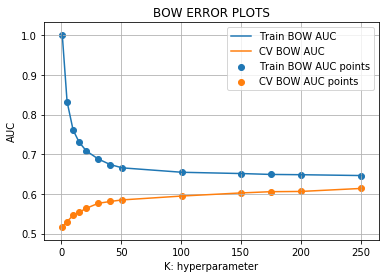

In [123]:
#import matplotlib.pyplot as plt
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.metrics import roc_auc_score
#"""
#y_true : array, shape = [n_samples] or [n_samples, n_classes]
#True binary labels or binary label indicators.
#
#y_score : array, shape = [n_samples] or [n_samples, n_classes]
#Target scores, can either be probability estimates of the positive class, confidence values, or non-thresholded measure of
#decisions (as returned by “decision_function” on some classifiers). 
#For binary y_true, y_score is supposed to be the score of the class with greater label.
#
#"""
#
#train_bow_auc = []
#cv_bow_auc = []
#K = [1, 5, 10, 15, 21, 31, 41, 51, 101, 150, 175, 200, 250]
#for i in tqdm(K):
#    neigh = KNeighborsClassifier(n_neighbors=i,algorithm='brute')
#    neigh.fit(X_tr_bow, y_train)
#
#    y_train_bow_pred = batch_predict(neigh, X_tr_bow)    
#    y_cv_bow_pred = batch_predict(neigh, X_cv_bow)
#
#    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
#    # not the predicted outputs   
#    # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html
#    train_bow_auc.append(roc_auc_score(y_train,y_train_bow_pred))
#    cv_bow_auc.append(roc_auc_score(y_cv, y_cv_bow_pred))
#    
###################################################################
## stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
#
#import pickle
#with open('train_bow_auc', 'wb') as f:
#    pickle.dump(train_bow_auc, f)
#import pickle
#with open('cv_bow_auc', 'wb') as f:
#    pickle.dump(cv_bow_auc, f)
###################################################################
#
#plt.plot(K, train_bow_auc, label='Train BOW AUC')
#plt.plot(K, cv_bow_auc, label='CV BOW AUC')
#
#plt.scatter(K, train_bow_auc, label='Train BOW AUC points')
#plt.scatter(K, cv_bow_auc, label='CV BOW AUC points')
#
#plt.legend()
#plt.xlabel("K: hyperparameter")
#plt.ylabel("AUC")
#plt.title("BOW ERROR PLOTS")
#plt.grid()
#plt.show()

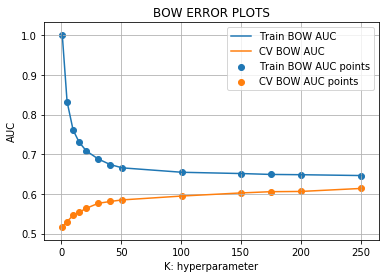

In [124]:
import matplotlib.pyplot as plt
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('train_bow_auc', 'rb') as f:
    train_bow_auc = pickle.load(f)
with open('cv_bow_auc', 'rb') as f:
    cv_bow_auc = pickle.load(f)    
  
plt.plot(K, train_bow_auc, label='Train BOW AUC')
plt.plot(K, cv_bow_auc, label='CV BOW AUC')

plt.scatter(K, train_bow_auc, label='Train BOW AUC points')
plt.scatter(K, cv_bow_auc, label='CV BOW AUC points')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("BOW ERROR PLOTS")
plt.grid()
plt.show()

In [125]:
best_bow_k = 200 #(choosing 150, because, when  concanating both the two above graph ( and seeing the y axis value)  )
# from the error plot we choose K such that, we will have maximum AUC on cv data and gap between the train and cv is less

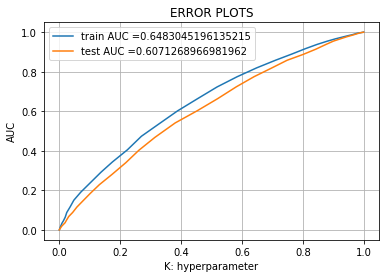

In [126]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


neigh = KNeighborsClassifier(n_neighbors=best_bow_k,algorithm='brute')
neigh.fit(X_tr_bow, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_bow_pred = batch_predict(neigh, X_tr_bow)    
y_test_bow_pred = batch_predict(neigh, X_te_bow)

train_bow_fpr, train_bow_tpr, tr_bow_thresholds = roc_curve(y_train, y_train_bow_pred)
test_bow_fpr, test_bow_tpr, te_bow_thresholds = roc_curve(y_test, y_test_bow_pred)

plt.plot(train_bow_fpr, train_bow_tpr, label="train AUC ="+str(auc(train_bow_fpr, train_bow_tpr)))
plt.plot(test_bow_fpr, test_bow_tpr, label="test AUC ="+str(auc(test_bow_fpr, test_bow_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [127]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [1]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_bow_pred, tr_bow_thresholds, train_bow_fpr, train_bow_fpr)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_bow_pred, te_bow_thresholds, test_bow_fpr, test_bow_fpr)))

Train confusion matrix


NameError: name 'y_train' is not defined

In [138]:
print(type(confusion_matrix))

<class 'function'>


In [139]:
array=confusion_matrix
print(array)

<function confusion_matrix at 0x000001EC97D7C2F0>


the maximum value of tpr*(1-fpr) 0.24965782718619006 for threshold 0.82
the maximum value of tpr*(1-fpr) 0.24959757392519719 for threshold 0.825


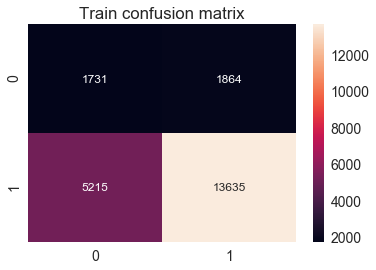

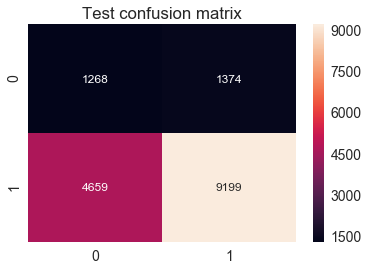

In [201]:
import seaborn as snTr
import seaborn as snTe
import pandas as pdH
import matplotlib.pyplot as plt

# https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
array=confusion_matrix(y_train, predict(y_train_bow_pred, tr_bow_thresholds, train_bow_fpr, train_bow_fpr))
df_cm = pdH.DataFrame(array,range(2),range(2))

# https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
arrayTe=confusion_matrix(y_test, predict(y_test_bow_pred, te_bow_thresholds, test_bow_fpr, test_bow_fpr))
df_cmTe = pdH.DataFrame(arrayTe,range(2),range(2))


# https://stackoverflow.com/questions/32723798/how-do-i-add-a-title-to-seaborn-heatmap
axTr = plt.axes()
axTr.set_title('Train confusion matrix')
snTr.set(font_scale=1.4)#for label size


# https://stackoverflow.com/questions/50947776/plot-two-seaborn-heatmap-graphs-side-by-side
fig, ax =plt.subplots(1,1)

axTe = plt.axes()
axTe.set_title('Test confusion matrix')
snTe.set(font_scale=1.4)#for label size

# https://seaborn.pydata.org/generated/seaborn.heatmap.html
snTr.heatmap(df_cm, annot=True,annot_kws={"size": 12},fmt="d",ax=axTr)# font size, format in digit


# https://seaborn.pydata.org/generated/seaborn.heatmap.html
snTe.heatmap(df_cmTe, annot=True,annot_kws={"size": 12},fmt="d",ax=axTe)# font size, format in digit



## For TFIDF | Simple for loop

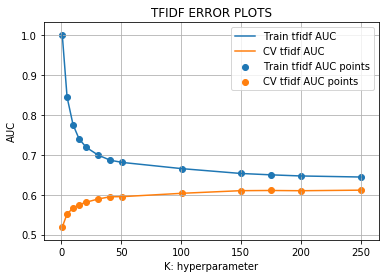

In [129]:
#import matplotlib.pyplot as plt
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.metrics import roc_auc_score
#"""
#y_true : array, shape = [n_samples] or [n_samples, n_classes]
#True binary labels or binary label indicators.
#
#y_score : array, shape = [n_samples] or [n_samples, n_classes]
#Target scores, can either be probability estimates of the positive class, confidence values, or non-thresholded measure of
#decisions (as returned by “decision_function” on some classifiers). 
#For binary y_true, y_score is supposed to be the score of the class with greater label.
#
#"""
#
#train_tfidf_auc = []
#cv_tfidf_auc = []
#K = [1, 5, 10, 15, 21, 31, 41, 51, 101, 150, 175, 200, 250]
##for i in K:
#for i in tqdm(K):    
#    neigh = KNeighborsClassifier(n_neighbors=i,algorithm='brute')
#    neigh.fit(X_tr_tfidf, y_train)
#    
#    #print(X_cv_tfidf.shape)
#
#    y_train_tfidf_pred = batch_predict(neigh, X_tr_tfidf)    
#    y_cv_tfidf_pred = batch_predict(neigh, X_cv_tfidf)
#    # this will predict the probablity for data x_tr ot cv
#
#    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
#    # not the predicted outputs        
#    
#    # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score
#    #
#    train_tfidf_auc.append(roc_auc_score(y_train,y_train_tfidf_pred))
#    cv_tfidf_auc.append(roc_auc_score(y_cv, y_cv_tfidf_pred))
#
###################################################################
## stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
#
#import pickle
#with open('train_tfidf_auc', 'wb') as f:
#    pickle.dump(train_tfidf_auc, f)
#
#with open('cv_tfidf_auc', 'wb') as f:
#    pickle.dump(cv_tfidf_auc, f)
###################################################################
#plt.plot(K, train_tfidf_auc, label='Train tfidf AUC')
#plt.plot(K, cv_tfidf_auc, label='CV tfidf AUC')
#
#plt.scatter(K, train_tfidf_auc, label='Train tfidf AUC points')
#plt.scatter(K, cv_tfidf_auc, label='CV tfidf AUC points')
#
#plt.legend()
#plt.xlabel("K: hyperparameter")
#plt.ylabel("AUC")
#plt.title("TFIDF ERROR PLOTS")
#plt.grid()
#plt.show()

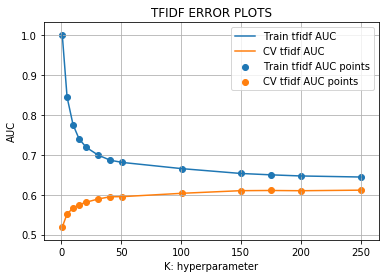

In [130]:
import matplotlib.pyplot as plt
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('train_tfidf_auc', 'rb') as f:
    train_tfidf_auc = pickle.load(f)
with open('cv_tfidf_auc', 'rb') as f:
    cv_tfidf_auc = pickle.load(f)    
  
plt.plot(K, train_tfidf_auc, label='Train tfidf AUC')
plt.plot(K, cv_tfidf_auc, label='CV tfidf AUC')

plt.scatter(K, train_tfidf_auc, label='Train tfidf AUC points')
plt.scatter(K, cv_tfidf_auc, label='CV tfidf AUC points')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("TFIDF ERROR PLOTS")
plt.grid()
plt.show()

In [131]:
best_tfidf_k = 200
# from the error plot we choose K such that, we will have maximum AUC on cv data and gap between the train and cv is less

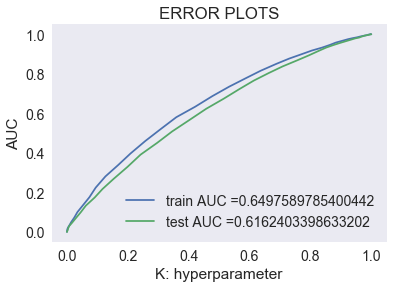

In [209]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


neigh = KNeighborsClassifier(n_neighbors=best_tfidf_k,algorithm='brute')
neigh.fit(X_tr_tfidf, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_tfidf_pred = batch_predict(neigh, X_tr_tfidf)    
y_test_tfidf_pred = batch_predict(neigh, X_te_tfidf)

# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
# Compute Receiver operating characteristic (ROC)
# y_true : array, shape = [n_samples]
#          True binary labels. If labels are not either {-1, 1} or {0, 1}, then pos_label should be explicitly given.
# y_score : array, shape = [n_samples]
#          Target scores, can either be probability estimates of the positive class, confidence values, or 
#          non-thresholded measure of decisions (as returned by “decision_function” on some classifiers).
#
# Returns:	
# fpr : array, shape = [>2]
#          Increasing false positive rates such that element i is the false positive rate of predictions 
#          with score >= thresholds[i].
#
# tpr : array, shape = [>2]
#          Increasing true positive rates such that element i is the true positive rate of predictions 
#          with score >= thresholds[i].
#
# thresholds : array, shape = [n_thresholds]
#          Decreasing thresholds on the decision function used to compute fpr and tpr. thresholds[0] represents
#          no instances being predicted and is arbitrarily set to max(y_score) + 1.
#

train_tfidf_fpr, train_tfidf_tpr, tr_tfidf_thresholds = roc_curve(y_train, y_train_tfidf_pred)
test_tfidf_fpr, test_tfidf_tpr, te_tfidf_thresholds = roc_curve(y_test, y_test_tfidf_pred)

plt.plot(train_tfidf_fpr, train_tfidf_tpr, label="train AUC ="+str(auc(train_tfidf_fpr, train_tfidf_tpr)))
plt.plot(test_tfidf_fpr, test_tfidf_tpr, label="test AUC ="+str(auc(test_tfidf_fpr, test_tfidf_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [203]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
print("="*100)
from sklearn.metrics import confusion_matrix

# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
# Compute confusion matrix to evaluate the accuracy of a classification
# Parameters:	
#     y_true : array, shape = [n_samples]     Ground truth (correct) target values.
#     y_pred : array, shape = [n_samples]     Estimated targets as returned by a classifier.
#     labels : array, shape = [n_classes], optional
#              List of labels to index the matrix. This may be used to reorder or select a subset of labels. 
#              If none is given, those that appear at least once in y_true or y_pred are used in sorted order.
#     sample_weight : array-like of shape = [n_samples], optional      Sample weights.
#
# Returns:	
#      C : array, shape = [n_classes, n_classes]         Confusion matrix
#

print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_tfidf_pred, tr_tfidf_thresholds, train_tfidf_fpr, train_tfidf_fpr)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_tfidf_pred, te_tfidf_thresholds, test_tfidf_fpr, test_tfidf_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.2495109689125485 for threshold 0.846
[[ 1877  1718]
 [ 5900 12950]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24975917471280046 for threshold 0.846
[[1280 1362]
 [4513 9345]]


the maximum value of tpr*(1-fpr) 0.2495109689125485 for threshold 0.846
the maximum value of tpr*(1-fpr) 0.24975917471280046 for threshold 0.846


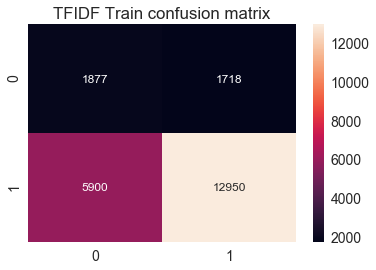

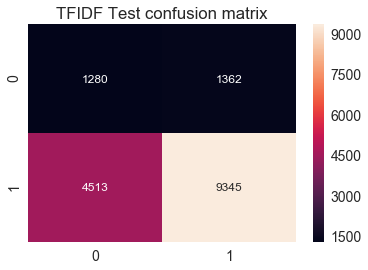

In [202]:
import seaborn as snTr
import seaborn as snTe
import pandas as pdH
import matplotlib.pyplot as plt

# https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
array=confusion_matrix(y_train, predict(y_train_tfidf_pred, tr_tfidf_thresholds, train_tfidf_fpr, train_tfidf_fpr))
df_cm = pdH.DataFrame(array,range(2),range(2))

# https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
arrayTe=confusion_matrix(y_test, predict(y_test_tfidf_pred, te_tfidf_thresholds, test_tfidf_fpr, test_tfidf_fpr))
df_cmTe = pdH.DataFrame(arrayTe,range(2),range(2))


# https://stackoverflow.com/questions/32723798/how-do-i-add-a-title-to-seaborn-heatmap
axTr = plt.axes()
axTr.set_title('TFIDF Train confusion matrix')
snTr.set(font_scale=1.4)#for label size


# https://stackoverflow.com/questions/50947776/plot-two-seaborn-heatmap-graphs-side-by-side
fig, ax =plt.subplots(1,1)

axTe = plt.axes()
axTe.set_title('TFIDF Test confusion matrix')
snTe.set(font_scale=1.4)#for label size

# https://seaborn.pydata.org/generated/seaborn.heatmap.html
snTr.heatmap(df_cm, annot=True,annot_kws={"size": 12},fmt="d",ax=axTr)# font size, format in digit


# https://seaborn.pydata.org/generated/seaborn.heatmap.html
snTe.heatmap(df_cmTe, annot=True,annot_kws={"size": 12},fmt="d",ax=axTe)# font size, format in digit



## for Avg W2V | Method 2: GridSearch or randomsearch

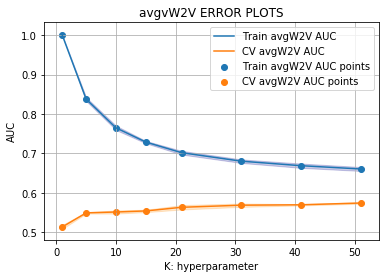

In [113]:
#from sklearn.neighbors import KNeighborsClassifier
## https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
#from sklearn.model_selection import GridSearchCV
#
#neigh = KNeighborsClassifier(algorithm='brute')
#parameters = {'n_neighbors':[1, 5, 10, 15, 21, 31, 41, 51]}
#clf = GridSearchCV(neigh, parameters, cv=3, scoring='roc_auc')
#clf.fit(X_tr_avgW2V, y_train)
#
#train_avgW2V_auc= clf.cv_results_['mean_train_score']
#train_avgW2V_auc_std= clf.cv_results_['std_train_score']
#cv_avgW2V_auc = clf.cv_results_['mean_test_score'] 
#cv_avgW2V_auc_std= clf.cv_results_['std_test_score']
#
#plt.plot(parameters['n_neighbors'], train_avgW2V_auc, label='Train avgW2V AUC')
## this code is copied from here: https://stackoverflow.com/a/48803361/4084039
#plt.gca().fill_between(parameters['n_neighbors'],train_avgW2V_auc - train_avgW2V_auc_std,train_avgW2V_auc + train_avgW2V_auc_std,alpha=0.2,color='darkblue')
#
#plt.plot(parameters['n_neighbors'], cv_avgW2V_auc, label='CV avgW2V AUC')
## this code is copied from here: https://stackoverflow.com/a/48803361/4084039
#plt.gca().fill_between(parameters['n_neighbors'],cv_avgW2V_auc - cv_avgW2V_auc_std,cv_avgW2V_auc + cv_avgW2V_auc_std,alpha=0.2,color='darkorange')
#
#plt.scatter(parameters['n_neighbors'], train_avgW2V_auc, label='Train avgW2V AUC points')
#plt.scatter(parameters['n_neighbors'], cv_avgW2V_auc, label='CV avgW2V AUC points')
#
#
#plt.legend()
#plt.xlabel("K: hyperparameter")
#plt.ylabel("AUC")
#plt.title("avgvW2V ERROR PLOTS")
#plt.grid()
#plt.show()

## for Avg W2V | Method 1: Simple for loop

100%|███████████████████████████████████████████████████████████████████████████████| 13/13 [2:09:06<00:00, 585.52s/it]


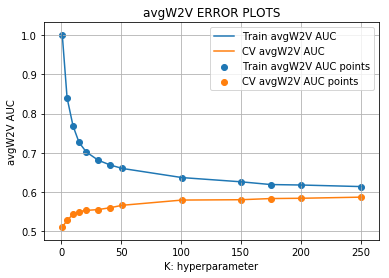

In [134]:
#import matplotlib.pyplot as plt
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.metrics import roc_auc_score
#"""
#y_true : array, shape = [n_samples] or [n_samples, n_classes]
#True binary labels or binary label indicators.
#
#y_score : array, shape = [n_samples] or [n_samples, n_classes]
#Target scores, can either be probability estimates of the positive class, confidence values, or non-thresholded measure of
#decisions (as returned by “decision_function” on some classifiers). 
#For binary y_true, y_score is supposed to be the score of the class with greater label.
#
#"""
#
#train_avgW2V_auc = []
#cv_avgW2V_auc = []
#K = [1, 5, 10, 15, 21, 31, 41, 51, 101, 150, 175, 200, 250]
##for i in K:
#for i in tqdm(K):
#    # https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
#    # Classifier implementing the k-nearest neighbors vote.
#    # fit(X, y)	Fit the model using X as training data and y as target values
#    neigh = KNeighborsClassifier(n_neighbors=i,algorithm='brute')
#    neigh.fit(X_tr_avgW2V, y_train)
#    
#    #print(X_cv_tfidf.shape)
#
#    y_train_avgW2V_pred = batch_predict(neigh, X_tr_avgW2V)    
#    y_cv_avgW2V_pred = batch_predict(neigh, X_cv_avgW2V)
#
#    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
#    # not the predicted outputs    
#    
#    # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score
#    # Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.
#    # y_true : array, shape = [n_samples] or [n_samples, n_classes] True binary labels or binary label indicators.
#    # y_score : array, shape = [n_samples] or [n_samples, n_classes]
#    # Target scores, can either be probability estimates of the positive class, confidence values, 
#    # or non-thresholded measure of decisions (as returned by “decision_function” on some classifiers). 
#    # For binary y_true, y_score is supposed to be the score of the class with greater label.
#    #
#    # Returns:	 auc : float
#    
#    train_avgW2V_auc.append(roc_auc_score(y_train,y_train_avgW2V_pred))
#    cv_avgW2V_auc.append(roc_auc_score(y_cv, y_cv_avgW2V_pred))
#
###################################################################
## stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
#
#import pickle
#with open('train_avgW2V_auc', 'wb') as f:
#    pickle.dump(train_avgW2V_auc, f)
#
#with open('cv_avgW2V_auc', 'wb') as f:
#    pickle.dump(cv_avgW2V_auc, f)
###################################################################    
#plt.plot(K, train_avgW2V_auc, label='Train avgW2V AUC')
#plt.plot(K, cv_avgW2V_auc, label='CV avgW2V AUC')
#
#plt.scatter(K, train_avgW2V_auc, label='Train avgW2V AUC points')
#plt.scatter(K, cv_avgW2V_auc, label='CV avgW2V AUC points')
#
#plt.legend()
#plt.xlabel("K: hyperparameter")
#plt.ylabel("avgW2V AUC")
#plt.title("avgW2V ERROR PLOTS")
#plt.grid()
#plt.show()

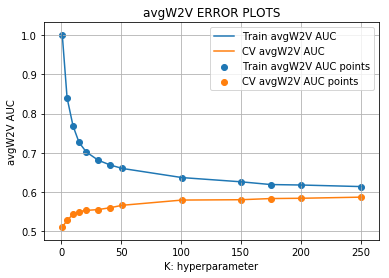

In [135]:
import matplotlib.pyplot as plt
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('train_avgW2V_auc', 'rb') as f:
    train_avgW2V_auc = pickle.load(f)
with open('cv_avgW2V_auc', 'rb') as f:
    cv_avgW2V_auc = pickle.load(f)    
  
plt.plot(K, train_avgW2V_auc, label='Train avgW2V AUC')
plt.plot(K, cv_avgW2V_auc, label='CV avgW2V AUC')

plt.scatter(K, train_avgW2V_auc, label='Train avgW2V AUC points')
plt.scatter(K, cv_avgW2V_auc, label='CV avgW2V AUC points')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("avgW2V AUC")
plt.title("avgW2V ERROR PLOTS")
plt.grid()
plt.show()

In [136]:
best_avgW2V_k = 175
# from the error plot we choose K such that, we will have maximum AUC on cv data and gap between the train and cv is less

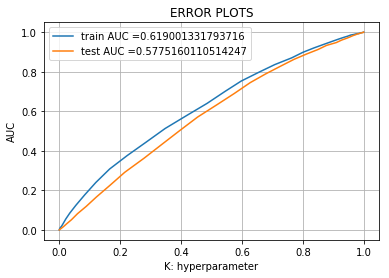

In [137]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


neigh = KNeighborsClassifier(n_neighbors=best_avgW2V_k,algorithm='brute')
neigh.fit(X_tr_avgW2V, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_avgW2V_pred = batch_predict(neigh, X_tr_avgW2V)    
y_test_avgW2V_pred = batch_predict(neigh, X_te_avgW2V)

# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
# Compute Receiver operating characteristic (ROC)
# y_true : array, shape = [n_samples]
#          True binary labels. If labels are not either {-1, 1} or {0, 1}, then pos_label should be explicitly given.
# y_score : array, shape = [n_samples]
#          Target scores, can either be probability estimates of the positive class, confidence values, or 
#          non-thresholded measure of decisions (as returned by “decision_function” on some classifiers).
#
# Returns:	
# fpr : array, shape = [>2]
#          Increasing false positive rates such that element i is the false positive rate of predictions 
#          with score >= thresholds[i].
#
# tpr : array, shape = [>2]
#          Increasing true positive rates such that element i is the true positive rate of predictions 
#          with score >= thresholds[i].
#
# thresholds : array, shape = [n_thresholds]
#          Decreasing thresholds on the decision function used to compute fpr and tpr. thresholds[0] represents
#          no instances being predicted and is arbitrarily set to max(y_score) + 1.
#

train_avgW2V_fpr, train_avgW2V_tpr, tr_avgW2V_thresholds = roc_curve(y_train, y_train_avgW2V_pred)
test_avgW2V_fpr, test_avgW2V_tpr, te_avgW2V_thresholds = roc_curve(y_test, y_test_avgW2V_pred)

plt.plot(train_avgW2V_fpr, train_avgW2V_tpr, label="train AUC ="+str(auc(train_avgW2V_fpr, train_avgW2V_tpr)))
plt.plot(test_avgW2V_fpr, test_avgW2V_tpr, label="test AUC ="+str(auc(test_avgW2V_fpr, test_avgW2V_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [162]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
print("="*100)
from sklearn.metrics import confusion_matrix

# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
# Compute confusion matrix to evaluate the accuracy of a classification
# Parameters:	
#     y_true : array, shape = [n_samples]     Ground truth (correct) target values.
#     y_pred : array, shape = [n_samples]     Estimated targets as returned by a classifier.
#     labels : array, shape = [n_classes], optional
#              List of labels to index the matrix. This may be used to reorder or select a subset of labels. 
#              If none is given, those that appear at least once in y_true or y_pred are used in sorted order.
#     sample_weight : array-like of shape = [n_samples], optional      Sample weights.
#
# Returns:	
#      C : array, shape = [n_classes, n_classes]         Confusion matrix
#

print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_avgW2V_pred, tr_avgW2V_thresholds, train_avgW2V_fpr, train_avgW2V_fpr)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_avgW2V_pred, te_avgW2V_thresholds, test_avgW2V_fpr, test_avgW2V_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.2497947814245175 for threshold 0.857
[[ 1849  1746]
 [ 6781 12069]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24965602527390474 for threshold 0.857
[[1272 1370]
 [5073 8785]]


the maximum value of tpr*(1-fpr) 0.2497947814245175 for threshold 0.857
the maximum value of tpr*(1-fpr) 0.24965602527390474 for threshold 0.857


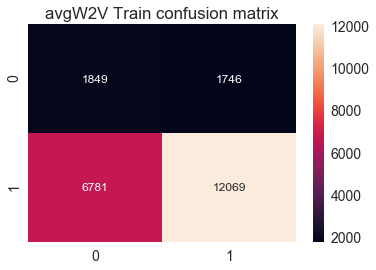

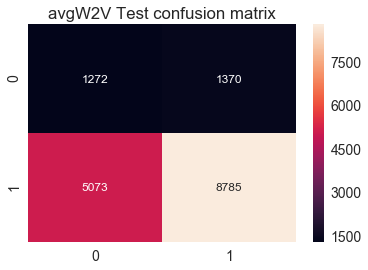

In [204]:
import seaborn as snTr
import seaborn as snTe
import pandas as pdH
import matplotlib.pyplot as plt

# https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
array=confusion_matrix(y_train, predict(y_train_avgW2V_pred, tr_avgW2V_thresholds, train_avgW2V_fpr, train_avgW2V_fpr))
df_cm = pdH.DataFrame(array,range(2),range(2))

# https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
arrayTe=confusion_matrix(y_test, predict(y_test_avgW2V_pred, te_avgW2V_thresholds, test_avgW2V_fpr, test_avgW2V_fpr))
df_cmTe = pdH.DataFrame(arrayTe,range(2),range(2))


# https://stackoverflow.com/questions/32723798/how-do-i-add-a-title-to-seaborn-heatmap
axTr = plt.axes()
axTr.set_title('avgW2V Train confusion matrix')
snTr.set(font_scale=1.4)#for label size


# https://stackoverflow.com/questions/50947776/plot-two-seaborn-heatmap-graphs-side-by-side
fig, ax =plt.subplots(1,1)

axTe = plt.axes()
axTe.set_title('avgW2V Test confusion matrix')
snTe.set(font_scale=1.4)#for label size

# https://seaborn.pydata.org/generated/seaborn.heatmap.html
snTr.heatmap(df_cm, annot=True,annot_kws={"size": 12},fmt="d",ax=axTr)# font size, format in digit


# https://seaborn.pydata.org/generated/seaborn.heatmap.html
snTe.heatmap(df_cmTe, annot=True,annot_kws={"size": 12},fmt="d",ax=axTe)# font size, format in digit



## for TFIDF W2V | Simple for loop

100%|███████████████████████████████████████████████████████████████████████████████| 13/13 [1:53:53<00:00, 530.07s/it]


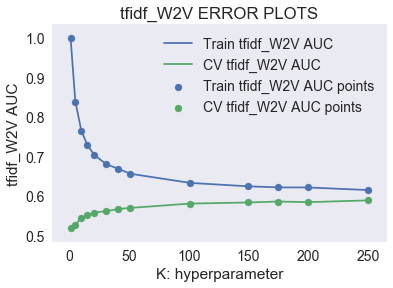

In [163]:
#import matplotlib.pyplot as plt
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.metrics import roc_auc_score
#"""
#y_true : array, shape = [n_samples] or [n_samples, n_classes]
#True binary labels or binary label indicators.
#
#y_score : array, shape = [n_samples] or [n_samples, n_classes]
#Target scores, can either be probability estimates of the positive class, confidence values, or non-thresholded measure of
#decisions (as returned by “decision_function” on some classifiers). 
#For binary y_true, y_score is supposed to be the score of the class with greater label.
#
#"""
#
#train_tfidf_W2V_auc = []
#cv_tfidf_W2V_auc = []
#K = [1, 5, 10, 15, 21, 31, 41, 51, 101, 150, 175, 200, 250]
##for i in K:
#for i in tqdm(K):    
#    # https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
#    # Classifier implementing the k-nearest neighbors vote.
#    # fit(X, y)	Fit the model using X as training data and y as target values
#    neigh = KNeighborsClassifier(n_neighbors=i,algorithm='brute')
#    neigh.fit(X_tr_tfidf_W2V, y_train)
#    
#    #print(X_cv_tfidf.shape)
#
#    y_train_tfidf_W2V_pred = batch_predict(neigh, X_tr_tfidf_W2V)    
#    y_cv_tfidf_W2V_pred = batch_predict(neigh, X_cv_tfidf_W2V)
#
#    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
#    # not the predicted outputs    
#    
#    # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score
#    # Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.
#    # y_true : array, shape = [n_samples] or [n_samples, n_classes] True binary labels or binary label indicators.
#    # y_score : array, shape = [n_samples] or [n_samples, n_classes]
#    # Target scores, can either be probability estimates of the positive class, confidence values, 
#    # or non-thresholded measure of decisions (as returned by “decision_function” on some classifiers). 
#    # For binary y_true, y_score is supposed to be the score of the class with greater label.
#    #
#    # Returns:	 auc : float
#    
#    train_tfidf_W2V_auc.append(roc_auc_score(y_train,y_train_tfidf_W2V_pred))
#    cv_tfidf_W2V_auc.append(roc_auc_score(y_cv, y_cv_tfidf_W2V_pred))
#
###################################################################
## stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
#
#import pickle
#with open('train_tfidf_W2V_auc', 'wb') as f:
#    pickle.dump(train_tfidf_W2V_auc, f)
#
#with open('cv_tfidf_W2V_auc', 'wb') as f:
#    pickle.dump(cv_tfidf_W2V_auc, f)
###################################################################   
#plt.plot(K, train_tfidf_W2V_auc, label='Train tfidf_W2V AUC')
#plt.plot(K, cv_tfidf_W2V_auc, label='CV tfidf_W2V AUC')
#
#plt.scatter(K, train_tfidf_W2V_auc, label='Train tfidf_W2V AUC points')
#plt.scatter(K, cv_tfidf_W2V_auc, label='CV tfidf_W2V AUC points')
#
#plt.legend()
#plt.xlabel("K: hyperparameter")
#plt.ylabel("tfidf_W2V AUC")
#plt.title("tfidf_W2V ERROR PLOTS")
#plt.grid()
#plt.show()

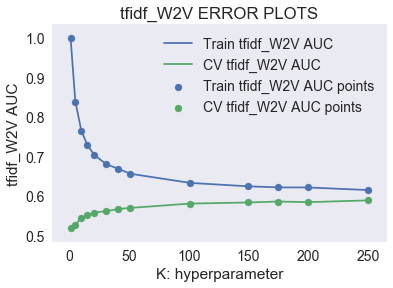

In [164]:
import matplotlib.pyplot as plt
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('train_tfidf_W2V_auc', 'rb') as f:
    train_tfidf_W2V_auc = pickle.load(f)
with open('cv_tfidf_W2V_auc', 'rb') as f:
    cv_tfidf_W2V_auc = pickle.load(f)    
  
plt.plot(K, train_tfidf_W2V_auc, label='Train tfidf_W2V AUC')
plt.plot(K, cv_tfidf_W2V_auc, label='CV tfidf_W2V AUC')

plt.scatter(K, train_tfidf_W2V_auc, label='Train tfidf_W2V AUC points')
plt.scatter(K, cv_tfidf_W2V_auc, label='CV tfidf_W2V AUC points')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("tfidf_W2V AUC")
plt.title("tfidf_W2V ERROR PLOTS")
plt.grid()
plt.show()

In [165]:
best_tfidfW2V_k = 175
# from the error plot we choose K such that, we will have maximum AUC on cv data and gap between the train and cv is less

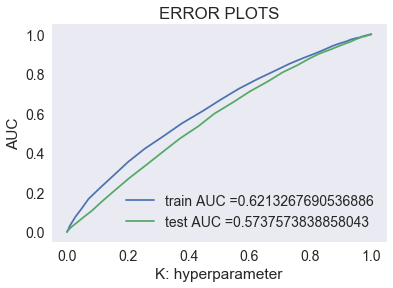

In [166]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


neigh = KNeighborsClassifier(n_neighbors=best_tfidfW2V_k,algorithm='brute')
neigh.fit(X_tr_tfidf_W2V, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_tfidf_W2V_pred = batch_predict(neigh, X_tr_tfidf_W2V)    
y_test_tfidf_W2V_pred = batch_predict(neigh, X_te_tfidf_W2V)

# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
# Compute Receiver operating characteristic (ROC)
# y_true : array, shape = [n_samples]
#          True binary labels. If labels are not either {-1, 1} or {0, 1}, then pos_label should be explicitly given.
# y_score : array, shape = [n_samples]
#          Target scores, can either be probability estimates of the positive class, confidence values, or 
#          non-thresholded measure of decisions (as returned by “decision_function” on some classifiers).
#
# Returns:	
# fpr : array, shape = [>2]
#          Increasing false positive rates such that element i is the false positive rate of predictions 
#          with score >= thresholds[i].
#
# tpr : array, shape = [>2]
#          Increasing true positive rates such that element i is the true positive rate of predictions 
#          with score >= thresholds[i].
#
# thresholds : array, shape = [n_thresholds]
#          Decreasing thresholds on the decision function used to compute fpr and tpr. thresholds[0] represents
#          no instances being predicted and is arbitrarily set to max(y_score) + 1.
#

train_tfidf_W2V_fpr, train_tfidf_W2V_tpr, tr_tfidf_W2V_thresholds = roc_curve(y_train, y_train_tfidf_W2V_pred)
test_tfidf_W2V_fpr, test_tfidf_W2V_tpr, te_tfidf_W2V_thresholds = roc_curve(y_test, y_test_tfidf_W2V_pred)

plt.plot(train_tfidf_W2V_fpr, train_tfidf_W2V_tpr, label="train AUC ="+str(auc(train_tfidf_W2V_fpr, train_tfidf_W2V_tpr)))
plt.plot(test_tfidf_W2V_fpr, test_tfidf_W2V_tpr, label="test AUC ="+str(auc(test_tfidf_W2V_fpr, test_tfidf_W2V_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [167]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
print("="*100)
from sklearn.metrics import confusion_matrix

# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
# Compute confusion matrix to evaluate the accuracy of a classification
# Parameters:	
#     y_true : array, shape = [n_samples]     Ground truth (correct) target values.
#     y_pred : array, shape = [n_samples]     Estimated targets as returned by a classifier.
#     labels : array, shape = [n_classes], optional
#              List of labels to index the matrix. This may be used to reorder or select a subset of labels. 
#              If none is given, those that appear at least once in y_true or y_pred are used in sorted order.
#     sample_weight : array-like of shape = [n_samples], optional      Sample weights.
#
# Returns:	
#      C : array, shape = [n_classes, n_classes]         Confusion matrix
#

print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_tfidf_W2V_pred, tr_tfidf_W2V_thresholds, train_tfidf_W2V_fpr, train_tfidf_W2V_fpr)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_tfidf_W2V_pred, te_tfidf_W2V_thresholds, test_tfidf_W2V_fpr, test_tfidf_W2V_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24995726950388908 for threshold 0.851
[[ 1774  1821]
 [ 6214 12636]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24974728387470552 for threshold 0.857
[[1363 1279]
 [5572 8286]]


the maximum value of tpr*(1-fpr) 0.24995726950388908 for threshold 0.851
the maximum value of tpr*(1-fpr) 0.24974728387470552 for threshold 0.857


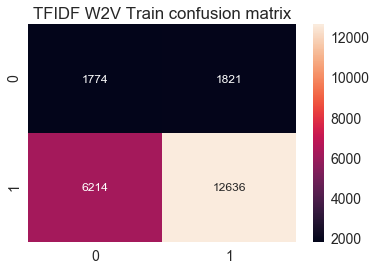

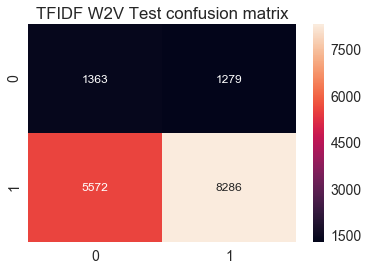

In [205]:
import seaborn as snTr
import seaborn as snTe
import pandas as pdH
import matplotlib.pyplot as plt

# https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
array=confusion_matrix(y_train, predict(y_train_tfidf_W2V_pred, tr_tfidf_W2V_thresholds, train_tfidf_W2V_fpr, train_tfidf_W2V_fpr))
df_cm = pdH.DataFrame(array,range(2),range(2))

# https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
arrayTe=confusion_matrix(y_test, predict(y_test_tfidf_W2V_pred, te_tfidf_W2V_thresholds, test_tfidf_W2V_fpr, test_tfidf_W2V_fpr))
df_cmTe = pdH.DataFrame(arrayTe,range(2),range(2))


# https://stackoverflow.com/questions/32723798/how-do-i-add-a-title-to-seaborn-heatmap
axTr = plt.axes()
axTr.set_title('TFIDF W2V Train confusion matrix')
snTr.set(font_scale=1.4)#for label size


# https://stackoverflow.com/questions/50947776/plot-two-seaborn-heatmap-graphs-side-by-side
fig, ax =plt.subplots(1,1)

axTe = plt.axes()
axTe.set_title('TFIDF W2V Test confusion matrix')
snTe.set(font_scale=1.4)#for label size

# https://seaborn.pydata.org/generated/seaborn.heatmap.html
snTr.heatmap(df_cm, annot=True,annot_kws={"size": 12},fmt="d",ax=axTr)# font size, format in digit


# https://seaborn.pydata.org/generated/seaborn.heatmap.html
snTe.heatmap(df_cmTe, annot=True,annot_kws={"size": 12},fmt="d",ax=axTe)# font size, format in digit



<h2>2.5 Feature selection with `SelectKBest` </h2>

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
    
# https://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection   
# 1.13.2. Univariate feature selection
# Univariate feature selection works by selecting the best features based on univariate statistical tests. 
# It can be seen as a preprocessing step to an estimator. 
# Scikit-learn exposes feature selection routines as objects that implement the transform method:
#
# SelectKBest removes all but the  highest scoring features
#
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html
# Select features according to the k highest scores.

# what does SelectKBest do
# https://datascience.stackexchange.com/questions/10773/how-does-selectkbest-work
# The SelectKBest class just scores the features using a function (in this case f_classif but could be others) 
# and then "removes all but the k highest scoring features".
# >> So its kind of a wrapper, the important thing here is the function you use to score the features.
# >> The k parameter is important if you use selector.fit_transform(), which will return a new array where the feature 
# set has been reduced to the best 'k'.


# https://www.quora.com/How-do-I-properly-use-SelectKBest-GridSearchCV-and-cross-validation-in-the-sklearn-package-together
# SelectKBest selects the top k features that have maximum relevance with the target variable. 
# It takes two parameters as input arguments, "k" (obviously) and the score function to rate the relevance of every 
# feature with the target variable. For example, for a regression problem, you can supply
# "feature_selection.f_regression" and for a classification problem, you can supply "feature_selection.f_classif".
#

<ol>
    <li><strong> [Task-2] </strong>
        <ul>
            <li>Select top 2000 features from feature <font color='red'>Set 2</font> using <a href='https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html'>`SelectKBest`</a>
and then apply KNN on top of these features</li>
            <li>
                <pre>
                from sklearn.datasets import load_digits
                from sklearn.feature_selection import SelectKBest, chi2
                X, y = load_digits(return_X_y=True)
                X.shape
                X_new = SelectKBest(chi2, k=20).fit_transform(X, y)
                X_new.shape
                ========
                output:
                (1797, 64)
                (1797, 20)
                </pre>
            </li>
            <li>Repeat the steps 2 and 3 on the data matrix after feature selection</li>
        </ul>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'> link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

In [168]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
print(X_tr_tfidf.shape)

tfidf_Feature= SelectKBest(chi2,k=2000)
X_tr_tfidf_2K=tfidf_Feature.fit_transform(X_tr_tfidf,y_train)
X_cv_tfidf_2K=tfidf_Feature.fit_transform(X_cv_tfidf,y_cv)
X_te_tfidf_2K=tfidf_Feature.fit_transform(X_te_tfidf,y_test)
#print(X_tr_tfidf_2K.shape)


(22445, 22516)


In [169]:
print("Final Data matrix | tfidf")
print(X_tr_tfidf_2K.shape, y_train.shape)
print(X_cv_tfidf_2K.shape, y_cv.shape)
print(X_te_tfidf_2K.shape, y_test.shape)
print("="*100)

Final Data matrix | tfidf
(22445, 2000) (22445,)
(11055, 2000) (11055,)
(16500, 2000) (16500,)


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [11:34<00:00, 54.70s/it]


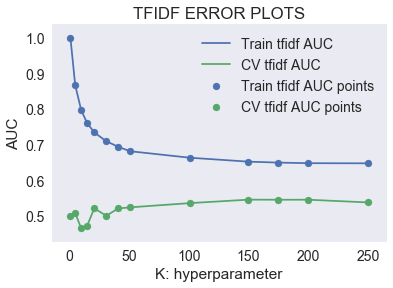

In [170]:
#import matplotlib.pyplot as plt
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.metrics import roc_auc_score
#"""
#y_true : array, shape = [n_samples] or [n_samples, n_classes]
#True binary labels or binary label indicators.
#
#y_score : array, shape = [n_samples] or [n_samples, n_classes]
#Target scores, can either be probability estimates of the positive class, confidence values, or non-thresholded measure of
#decisions (as returned by “decision_function” on some classifiers). 
#For binary y_true, y_score is supposed to be the score of the class with greater label.
#
#"""
#
#train_tfidf_SKB_auc = []
#cv_tfidf_SKB_auc = []
#K = [1, 5, 10, 15, 21, 31, 41, 51, 101, 150, 175, 200, 250]
#for i in tqdm(K):
#    neigh = KNeighborsClassifier(n_neighbors=i,algorithm='brute')
#    neigh.fit(X_tr_tfidf_2K, y_train)
#    
#    #print(X_cv_tfidf.shape)
#
#    y_train_tfidf_2K_pred = batch_predict(neigh, X_tr_tfidf_2K)    
#    y_cv_tfidf_2K_pred = batch_predict(neigh, X_cv_tfidf_2K)
#    # this will predict the probablity for data x_tr ot cv
#
#    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
#    # not the predicted outputs        
#    
#    # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score
#    #
#    train_tfidf_SKB_auc.append(roc_auc_score(y_train,y_train_tfidf_2K_pred))
#    cv_tfidf_SKB_auc.append(roc_auc_score(y_cv, y_cv_tfidf_2K_pred))
#
###################################################################
## stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
#
#import pickle
#with open('train_tfidf_SKB_auc', 'wb') as f:
#    pickle.dump(train_tfidf_SKB_auc, f)
#
#with open('cv_tfidf_SKB_auc', 'wb') as f:
#    pickle.dump(cv_tfidf_SKB_auc, f)
###################################################################
#plt.plot(K, train_tfidf_SKB_auc, label='Train tfidf AUC')
#plt.plot(K, cv_tfidf_SKB_auc, label='CV tfidf AUC')
#
#plt.scatter(K, train_tfidf_SKB_auc, label='Train tfidf AUC points')
#plt.scatter(K, cv_tfidf_SKB_auc, label='CV tfidf AUC points')
#
#plt.legend()
#plt.xlabel("K: hyperparameter")
#plt.ylabel("AUC")
#plt.title("TFIDF ERROR PLOTS")
#plt.grid()
#plt.show()

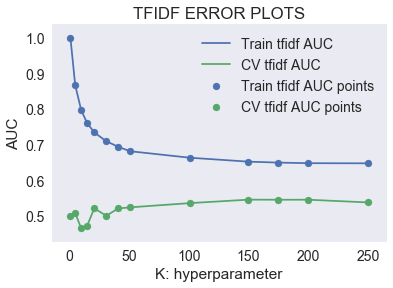

In [173]:
import matplotlib.pyplot as plt
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('train_tfidf_SKB_auc', 'rb') as f:
    train_tfidf_SKB_auc = pickle.load(f)
with open('cv_tfidf_SKB_auc', 'rb') as f:
    cv_tfidf_SKB_auc = pickle.load(f)    
  
plt.plot(K, train_tfidf_SKB_auc, label='Train tfidf AUC')
plt.plot(K, cv_tfidf_SKB_auc, label='CV tfidf AUC')

plt.scatter(K, train_tfidf_SKB_auc, label='Train tfidf AUC points')
plt.scatter(K, cv_tfidf_SKB_auc, label='CV tfidf AUC points')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("TFIDF ERROR PLOTS")
plt.grid()
plt.show()

In [171]:
best_tfidf_k = 175
# from the error plot we choose K such that, we will have maximum AUC on cv data and gap between the train and cv is less

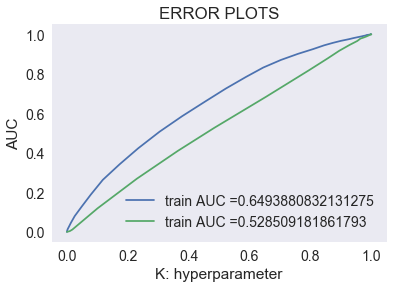

In [206]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


neigh = KNeighborsClassifier(n_neighbors=best_tfidf_k,algorithm='brute')
neigh.fit(X_tr_tfidf_2K, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_tfidf_2K_pred = batch_predict(neigh, X_tr_tfidf_2K)    
y_test_tfidf_2K_pred = batch_predict(neigh, X_te_tfidf_2K)

# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
# Compute Receiver operating characteristic (ROC)
# y_true : array, shape = [n_samples]
#          True binary labels. If labels are not either {-1, 1} or {0, 1}, then pos_label should be explicitly given.
# y_score : array, shape = [n_samples]
#          Target scores, can either be probability estimates of the positive class, confidence values, or 
#          non-thresholded measure of decisions (as returned by “decision_function” on some classifiers).
#
# Returns:	
# fpr : array, shape = [>2]
#          Increasing false positive rates such that element i is the false positive rate of predictions 
#          with score >= thresholds[i].
#
# tpr : array, shape = [>2]
#          Increasing true positive rates such that element i is the true positive rate of predictions 
#          with score >= thresholds[i].
#
# thresholds : array, shape = [n_thresholds]
#          Decreasing thresholds on the decision function used to compute fpr and tpr. thresholds[0] represents
#          no instances being predicted and is arbitrarily set to max(y_score) + 1.
#

train_tfidf_2K_fpr, train_tfidf_2K_tpr, tr_tfidf_2K_thresholds = roc_curve(y_train, y_train_tfidf_2K_pred)
test_tfidf_2K_fpr, test_tfidf_2K_tpr, te_tfidf_2K_thresholds = roc_curve(y_test, y_test_tfidf_2K_pred)

plt.plot(train_tfidf_2K_fpr, train_tfidf_2K_tpr, label="train AUC ="+str(auc(train_tfidf_2K_fpr, train_tfidf_2K_tpr)))
plt.plot(test_tfidf_2K_fpr, test_tfidf_2K_tpr, label="train AUC ="+str(auc(test_tfidf_2K_fpr, test_tfidf_2K_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [207]:

# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
print("="*100)
from sklearn.metrics import confusion_matrix

# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
# Compute confusion matrix to evaluate the accuracy of a classification
# Parameters:	
#     y_true : array, shape = [n_samples]     Ground truth (correct) target values.
#     y_pred : array, shape = [n_samples]     Estimated targets as returned by a classifier.
#     labels : array, shape = [n_classes], optional
#              List of labels to index the matrix. This may be used to reorder or select a subset of labels. 
#              If none is given, those that appear at least once in y_true or y_pred are used in sorted order.
#     sample_weight : array-like of shape = [n_samples], optional      Sample weights.
#
# Returns:	
#      C : array, shape = [n_classes, n_classes]         Confusion matrix
#

print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_tfidf_2K_pred, tr_tfidf_2K_thresholds, train_tfidf_2K_fpr, train_tfidf_2K_fpr)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_tfidf_2K_pred, te_tfidf_2K_thresholds, test_tfidf_2K_fpr, test_tfidf_2K_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24952319420613933 for threshold 0.88
[[ 1719  1876]
 [ 5184 13666]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24973510651039144 for threshold 0.886
[[1364 1278]
 [6567 7291]]


the maximum value of tpr*(1-fpr) 0.24952319420613933 for threshold 0.88
the maximum value of tpr*(1-fpr) 0.24973510651039144 for threshold 0.886


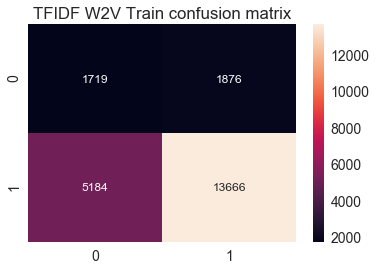

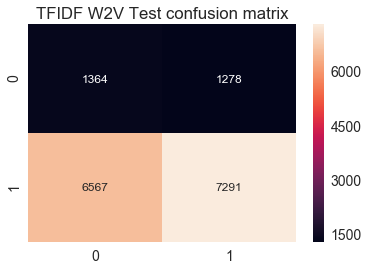

In [208]:
import seaborn as snTr
import seaborn as snTe
import pandas as pdH
import matplotlib.pyplot as plt

# https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
array=confusion_matrix(y_train, predict(y_train_tfidf_2K_pred, tr_tfidf_2K_thresholds, train_tfidf_2K_fpr, train_tfidf_2K_fpr))
df_cm = pdH.DataFrame(array,range(2),range(2))

# https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
arrayTe=confusion_matrix(y_test, predict(y_test_tfidf_2K_pred, te_tfidf_2K_thresholds, test_tfidf_2K_fpr, test_tfidf_2K_fpr))
df_cmTe = pdH.DataFrame(arrayTe,range(2),range(2))


# https://stackoverflow.com/questions/32723798/how-do-i-add-a-title-to-seaborn-heatmap
axTr = plt.axes()
axTr.set_title('TFIDF W2V Train confusion matrix')
snTr.set(font_scale=1.4)#for label size


# https://stackoverflow.com/questions/50947776/plot-two-seaborn-heatmap-graphs-side-by-side
fig, ax =plt.subplots(1,1)

axTe = plt.axes()
axTe.set_title('TFIDF W2V Test confusion matrix')
snTe.set(font_scale=1.4)#for label size

# https://seaborn.pydata.org/generated/seaborn.heatmap.html
snTr.heatmap(df_cm, annot=True,annot_kws={"size": 12},fmt="d",ax=axTr)# font size, format in digit


# https://seaborn.pydata.org/generated/seaborn.heatmap.html
snTe.heatmap(df_cmTe, annot=True,annot_kws={"size": 12},fmt="d",ax=axTe)# font size, format in digit



<h1>3. Conclusions</h1>

# Please compare all your models using Prettytable library

### Apology for not submitting in first attempt, actuallly i added the conclusion, but 
### since the size was biz and i could not able to convert into pdf, i made the copy and somehow this section was missed
### probably i didn't save the notepad before copying the file

In [210]:
# Please compare all your models using Prettytable library
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Vectorizer", "Model", "Hyper parameter", "AUC"]

x.add_row(["BOW", "Brute", 200, 0.607 ])
x.add_row(["TFIDF", "Brute", 200, 0.616 ])
x.add_row(["AvgW2V", "Brute", 175 , 0.577])
x.add_row(["TFIDF W2V", "Brute", 175, 0.573])


print(x)

+------------+-------+-----------------+-------+
| Vectorizer | Model | Hyper parameter |  AUC  |
+------------+-------+-----------------+-------+
|    BOW     | Brute |       200       | 0.607 |
|   TFIDF    | Brute |       200       | 0.616 |
|   AvgW2V   | Brute |       175       | 0.577 |
| TFIDF W2V  | Brute |       175       | 0.573 |
+------------+-------+-----------------+-------+


# Conclusion
## Step followed 
--------------
- Preprocessing of Project_subject_categories and Project_subject_subcategories 
- Preprocessing of Project_essay and Project_title
- Vectorization(one hot encoding) for clean_category, clean_subcategory, teacher_prefix
- Vectorization(one hot encoding) for BOW(project_essay and project_title) for TFIDF(project_essay and project _title)
- Vectorization of Average Word2Vec for Project_essay
- Vectorization of TFIDF weighted W2V for Project_essay
- Vectorization of Average Word2Vec for Project_title
- Vectorization of TFIDF weighted W2V for Project_title
- Vectorizing Numeric features (Standardization of Price column)
- Splitting Data into Train (further split into Train and Cross validation) and Test.
- Making datamodel ready
    - text
	- encoding school_state and convert into Train,CV and Test vector
	- encoding clean_category and convert into Train,CV and Test vector
	- encoding clean_subcategory and convert into Train,CV and Test vector
	- encoding project_grade_category and convert into Train,CV and Test vector
	- encoding teacher_prefix and convert into Train,CV and Test vector
	- encoding project_title(BOW) and convert into Train,CV and Test vector
	- encoding project_essay(BOW) and convert into Train,CV and Test vector
	- encoding project_resource_summary and convert into Train,CV and Test vector
    - numeric
	- encoding quantity and convert into Train,CV and Test vector
	- encoding teacher_number_of_previously_posted_projects and convert into Train,CV and Test vector
	- encoding price and convert into Train,CV and Test vector

- Merging all the above features for SET 1
	Horizontally merging( with hstack) all categorical, numerical features + project_title(BOW) + preprocessed_essay (BOW)
- Merging all the above features for SET 2
	- TFIDF vectorization for project_essay
	- TFIDF vectorization for project_title
	Horizontally merging( with hstack) all categorical, numerical features + project_title(TFIDF)+ preprocessed_essay (TFIDF)
- Merging all the above features for SET 3
	- Avg W2V vectorization for project_essay
	- Avg W2V vectorization for project_title
	Horizontally merging( with hstack) all categorical, numerical features + project_title(Avg W2V)+ preprocessed_essay (Avg W2V)
- Merging all the above features for SET 4
	- TFIDF W2V vectorization for project_essay
	- TFIDF W2V vectorization for project_title
	Horizontally merging( with hstack) all categorical, numerical features + project_title(TFIDF W2V)+ preprocessed_essay (TFIDF W2V)

- Hyper paramter tuning to find best K
  define batch_predict() function, which will takes Classifier and data as input
	1 Draw a graph for different value of K, between Train and CV of BOW data (SET 1)
	2 Choose the Best K, by seeing from above created graph
	3 Draw AUC for Train and Test data
	4 Create Confusion matrix, in heatmap.

	- Do the above four steps for TFIDF
	- Do the above four steps for avgW2V
	- Do the above four steps for TFIDF W2V

- with SelectKBest function, taking chi2 as function classifier and remove all  but top 2000, K highest scoring features, for TFIDF data (SET 2)
 	- Do all the four steps mentioned above.

P.S. After 1st subbmission, below changes i did.
- try to learn and implement pickle data, so it won;t waste my time in future assignment, just to rerun the cells from begining
- added tqdm in for loop, just to see the progress of execution.